# Mutation Up Analysis, Round02 - 06-03-2020
This Jupyter notebook will graph out the results of the second round of experiments. Previous rounds of experiments were not run correctly and the results were faulty.

In the experiments whose results are graphed below, a clonal population of a provided wild-type was evolved for 500,000 generations with an elevated mutation rate (point mutations = small insertions = small deletions = 4e-7; default (control) value = 1e-7). 

Five random seeds were used to validate the data; in all of the graphs, we graph out the *control* vs. *mutation up* condition.


## Read in the Data

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from ReadFunctions import read_fitness, read_bp, read_noncoding_bp

INPUT_ROOT_DIR = "C://Users//davis//Dropbox//Freiburg Masters Semesters//Thesis//Results//Round02//"
OUTPUT_ROOT_DIR = INPUT_ROOT_DIR + "Graphics//mut_up_analysis//"

print("Reading in the data...")

# STAT_BP_BEST
bp_best_names = ['generation', 'num_bp_not_in_any_CDS', 'num_bp_not_in_any_functional_CDS', 'num_bp_not_in_any_non-functional_CDS', 'num_bp_not_included_in_any_RNA', 'num_bp_not_included_in_any_coding_RNA', 'num_bp_not_included_in_any_non-coding_RNA', 'num_of_non-essential_bp', 'num_of_non-essential_bp_including_non-functional_genes']
# Control
df_seed01_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//control//stats//stat_bp_best.out")
#df_seed02_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//control//stats//stat_bp_best.out")
#df_seed03_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//control//stats//stat_bp_best.out")
#df_seed04_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//control//stats//stat_bp_best.out")
#df_seed05_control_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//control//stats//stat_bp_best.out")

# Mutation Up
#df_seed01_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_bp_best.out")
#df_seed02_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_bp_best.out")
#df_seed03_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_bp_best.out")
#df_seed04_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_bp_best.out")
#df_seed05_mutation_up_bp_best = read_bp(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_bp_best.out")

# STAT_FITNESS_BEST
fitness_best_names = ['generation', 'pop_size', 'fitness', 'genome_size', 'metabolic_error','parents_metabolic_error', 'metabolic_fitness', 'secretion_error', 'parents_secretion_error', 'secretion_fitness', 'amt_compound_present']
# Control
df_seed01_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//control//stats//stat_fitness_best.out")
df_seed02_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//control//stats//stat_fitness_best.out")
#df_seed03_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//control//stats//stat_fitness_best.out")
#df_seed04_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//control//stats//stat_fitness_best.out")
#df_seed05_control_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//control//stats//stat_fitness_best.out")

# Mutation Up
#df_seed01_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed01//mut_up//stats//stat_fitness_best.out")
#df_seed02_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed02//mut_up//stats//stat_fitness_best.out")
#df_seed03_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed03//mut_up//stats//stat_fitness_best.out")
#df_seed04_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed04//mut_up//stats//stat_fitness_best.out")
#df_seed05_mutation_up_fitness_best = read_fitness(INPUT_ROOT_DIR + "seed05//mut_up//stats//stat_fitness_best.out")

print("Done.")

Reading in the data...
Done.


## Graph results

Graphing...
fitness_best
done with fitness_best
bp_best
done.


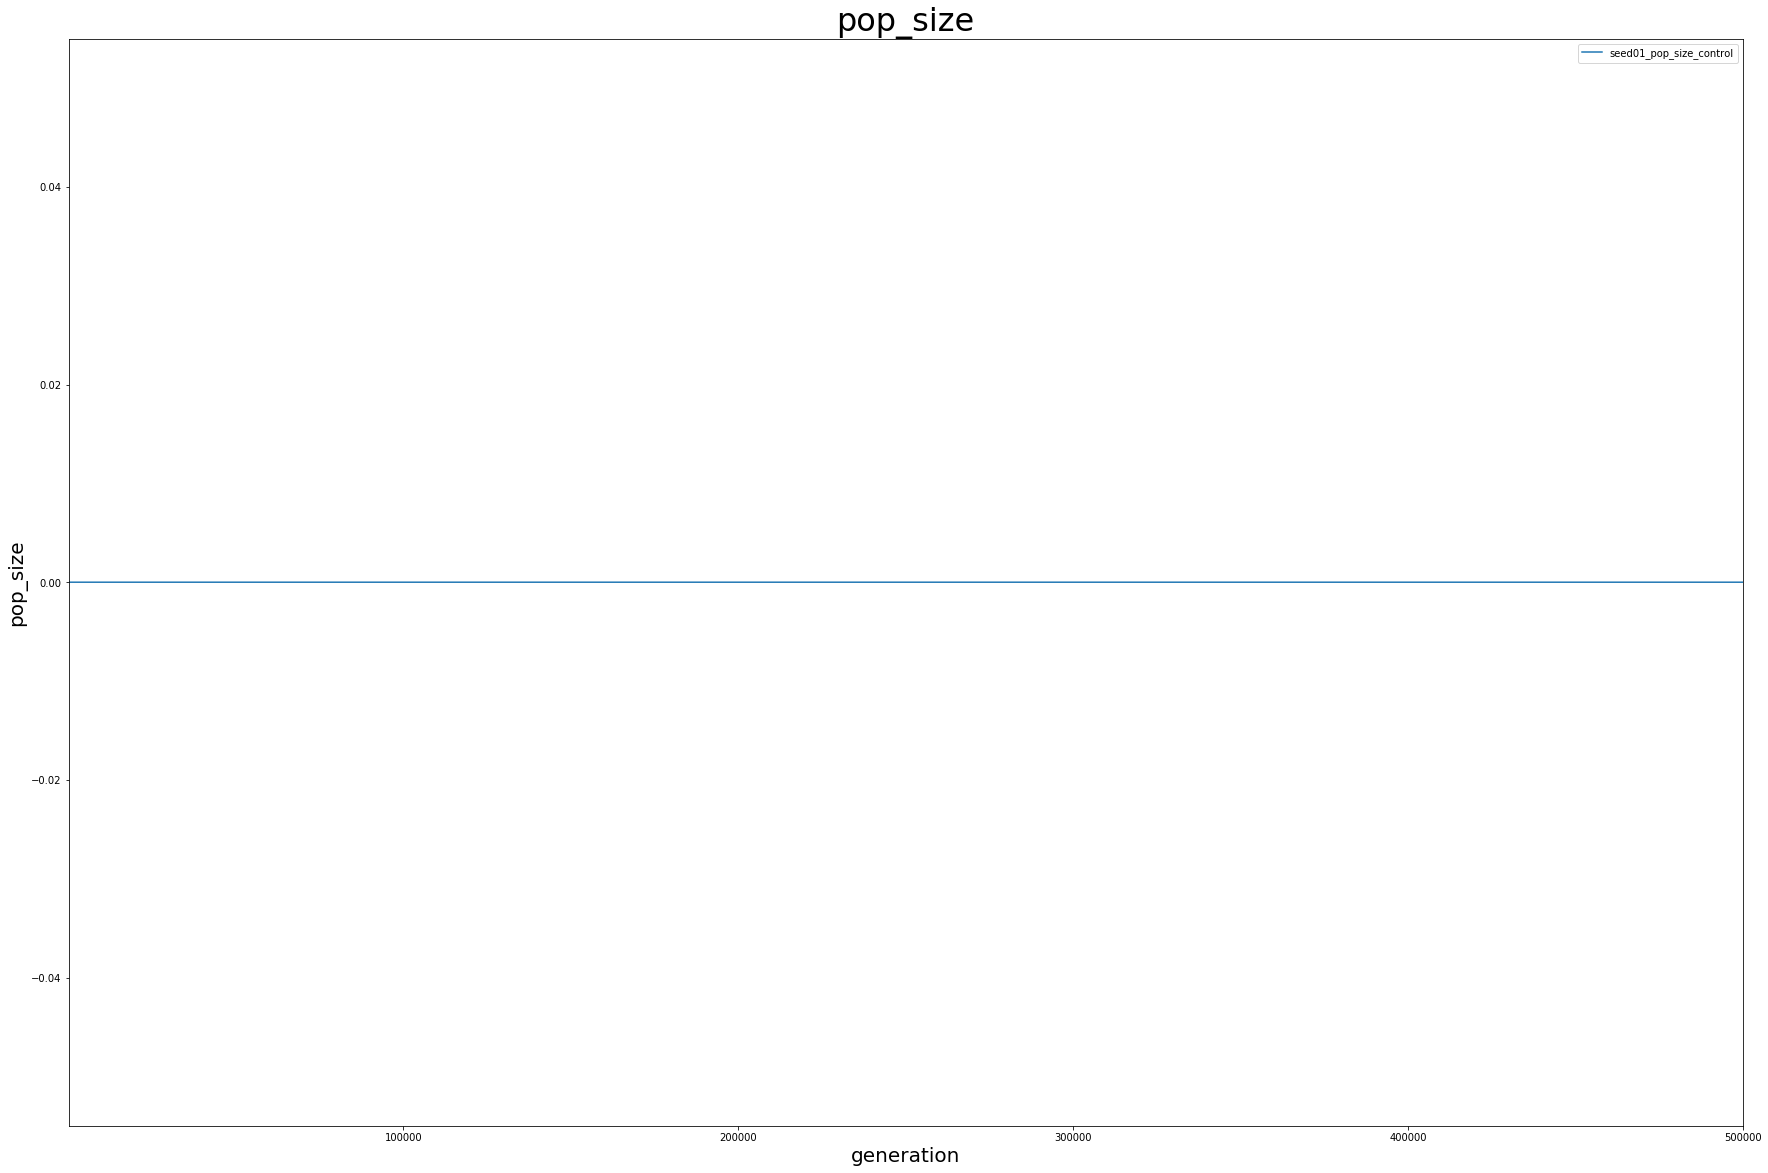

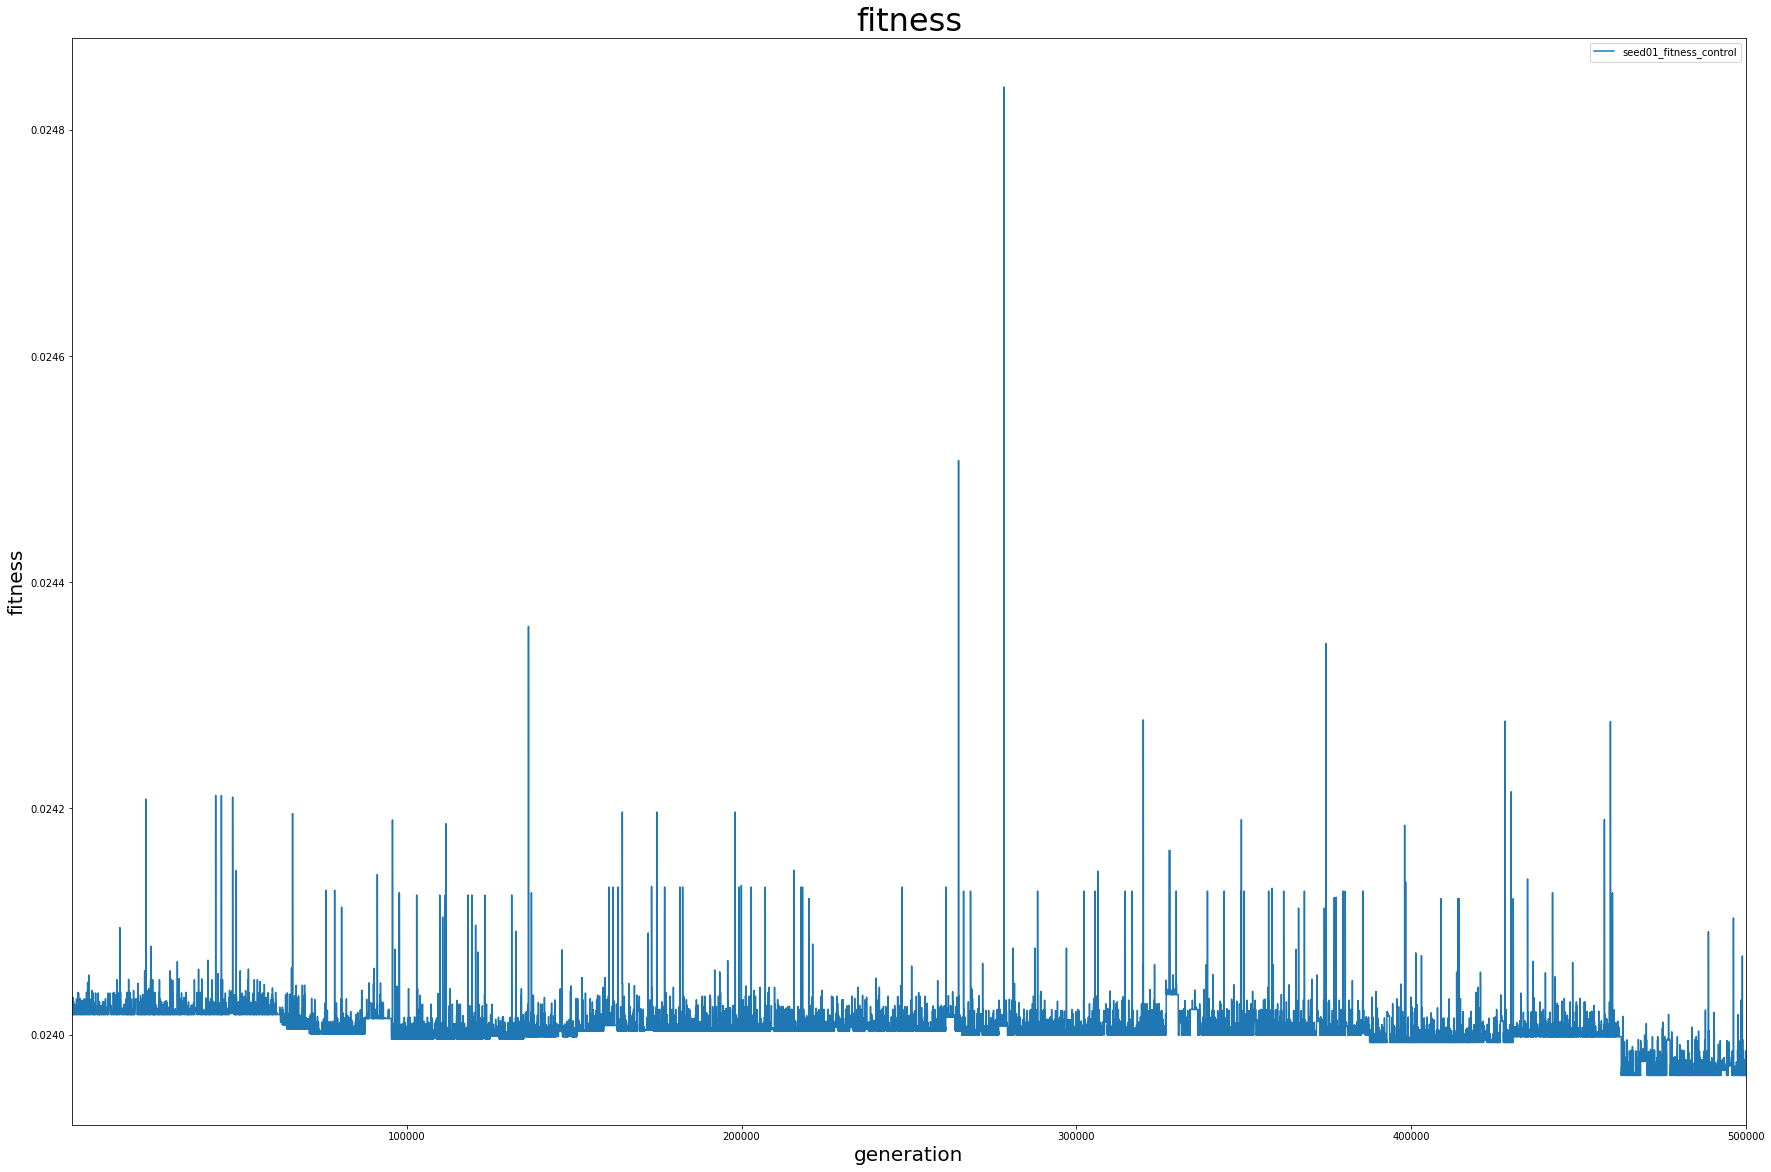

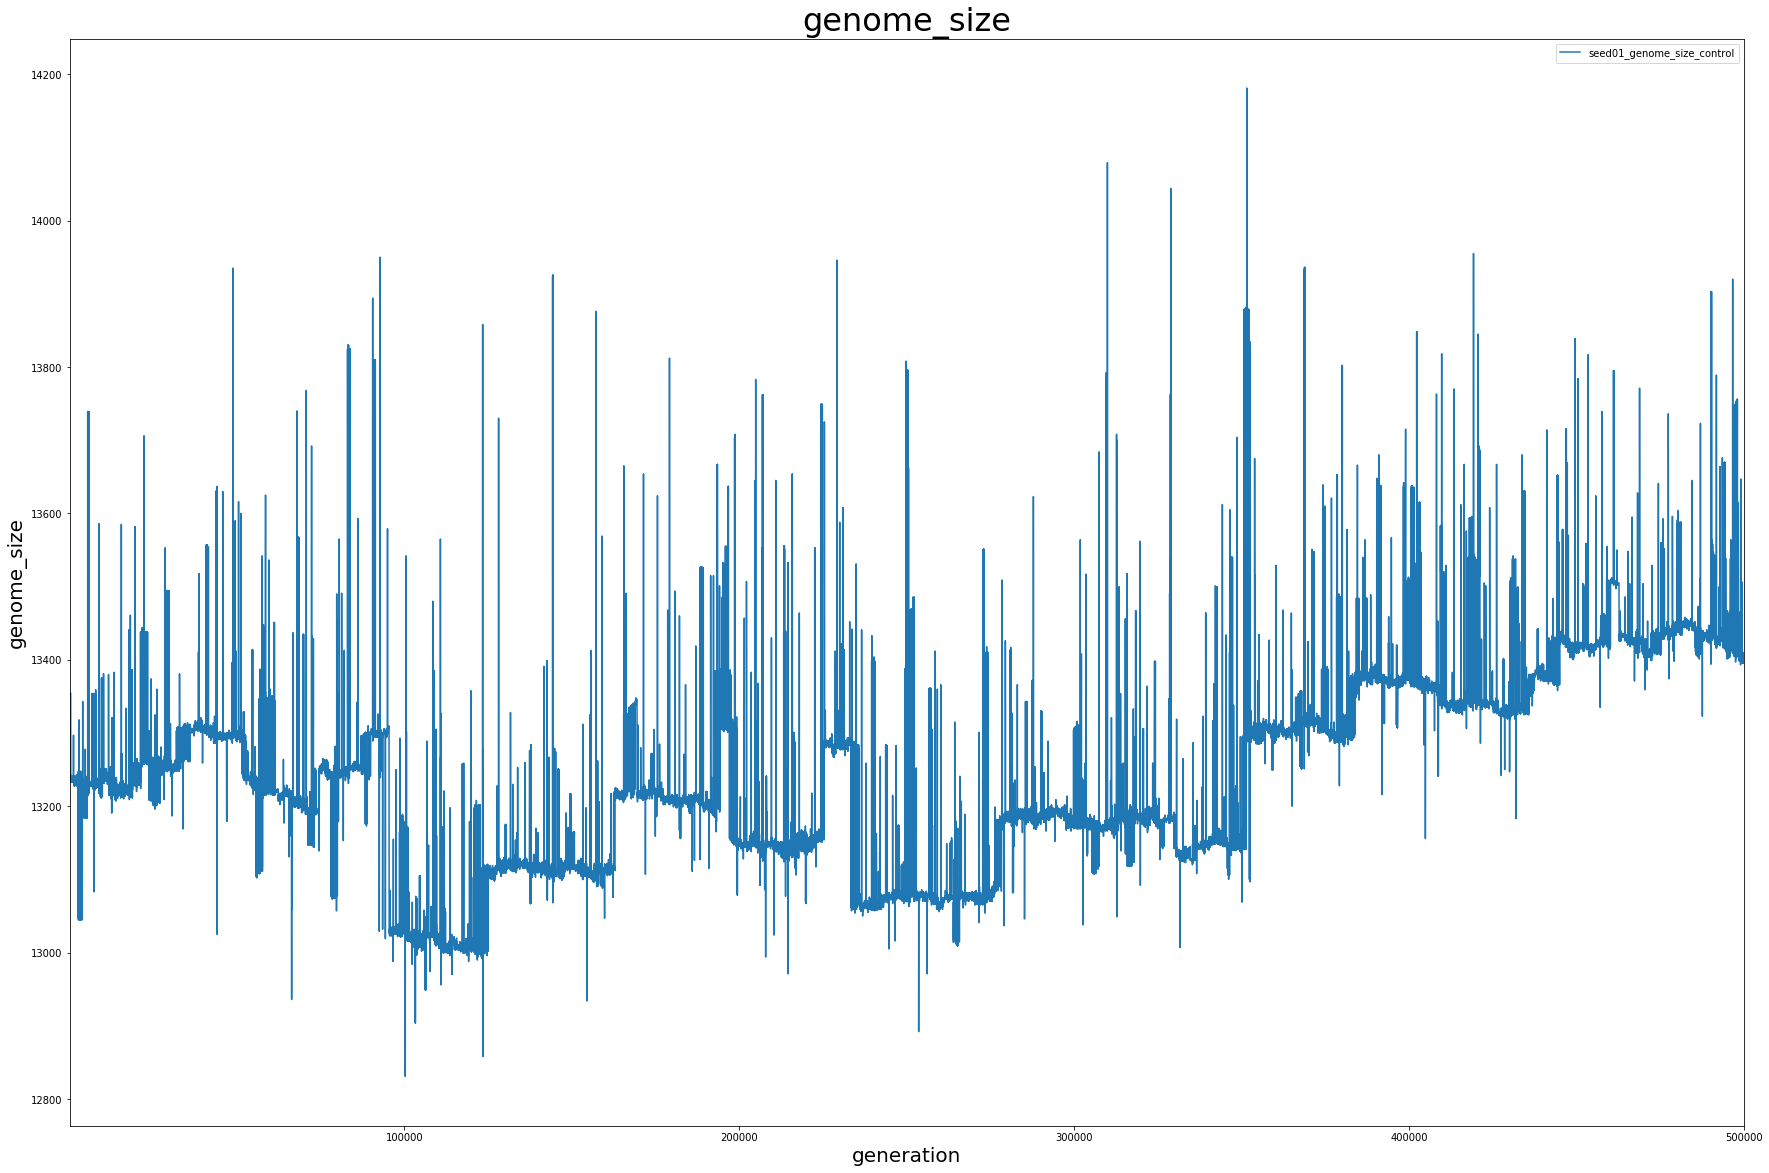

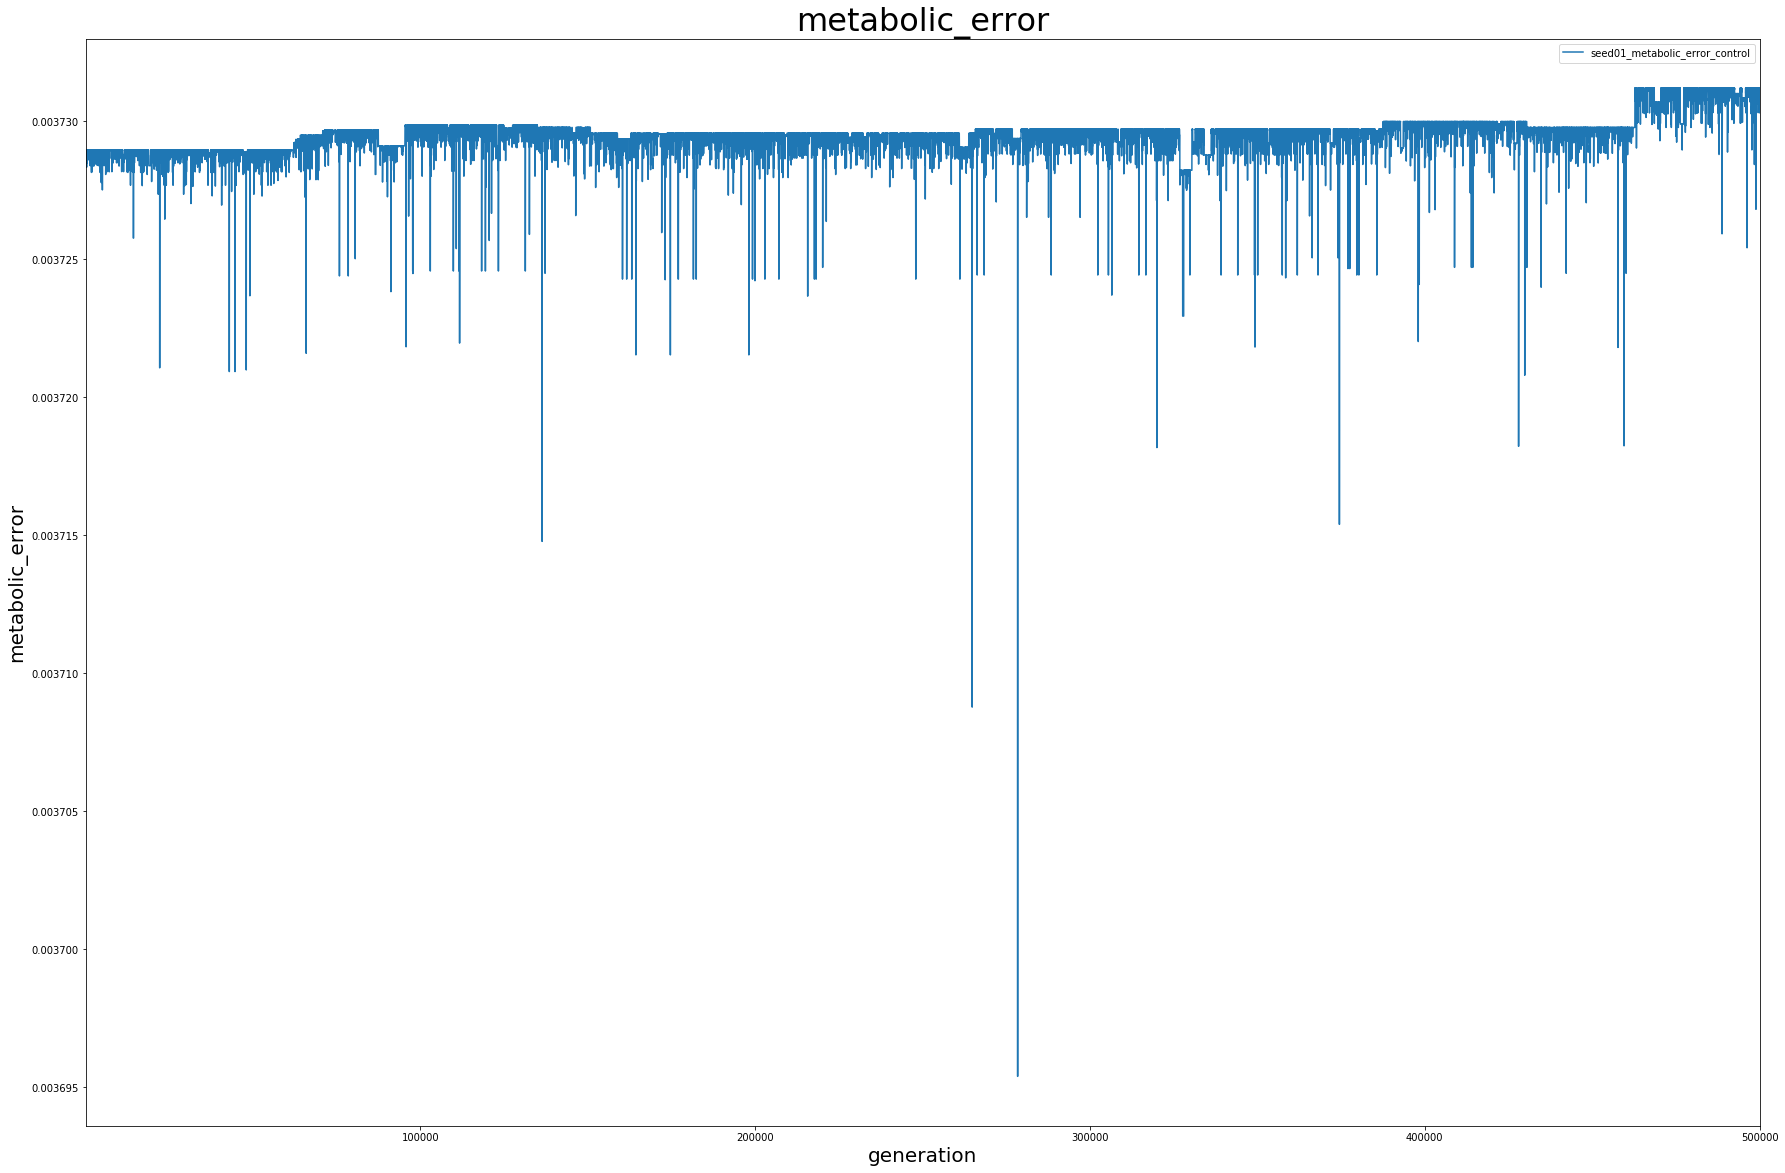

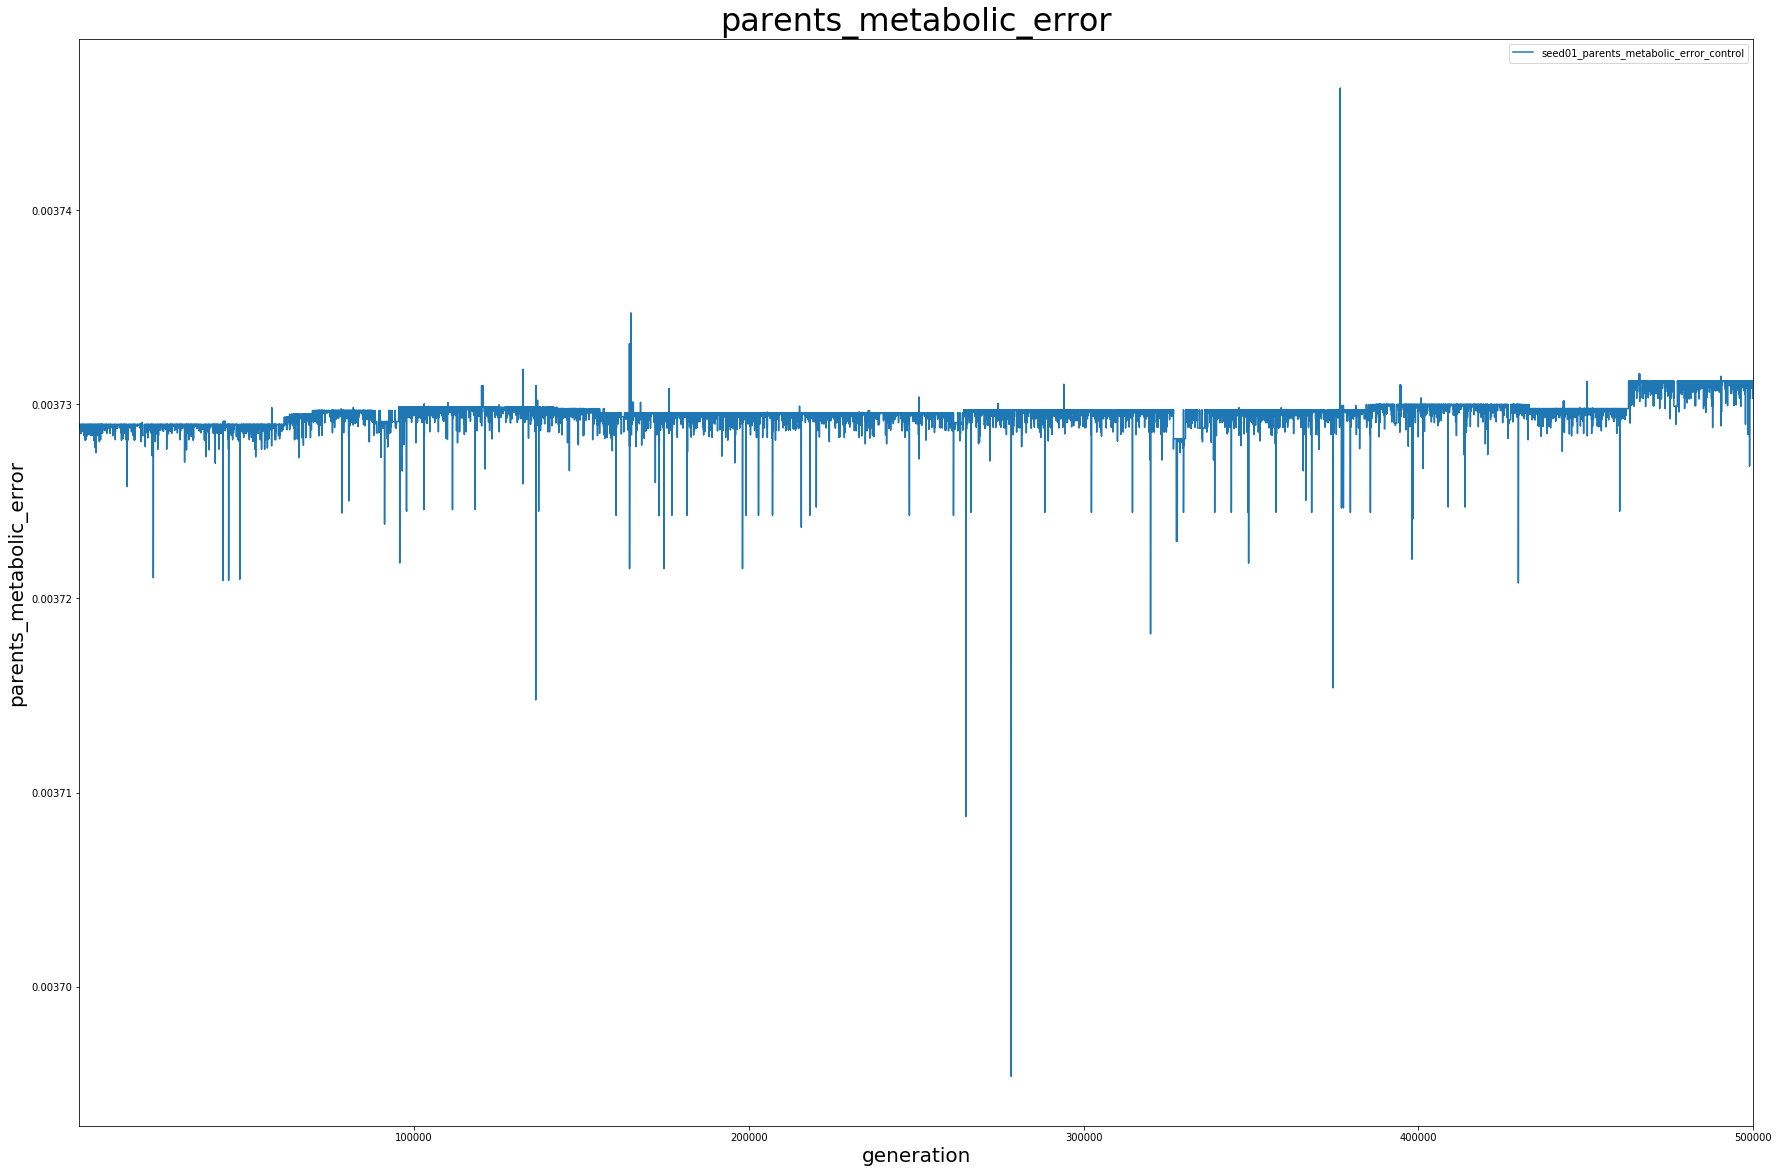

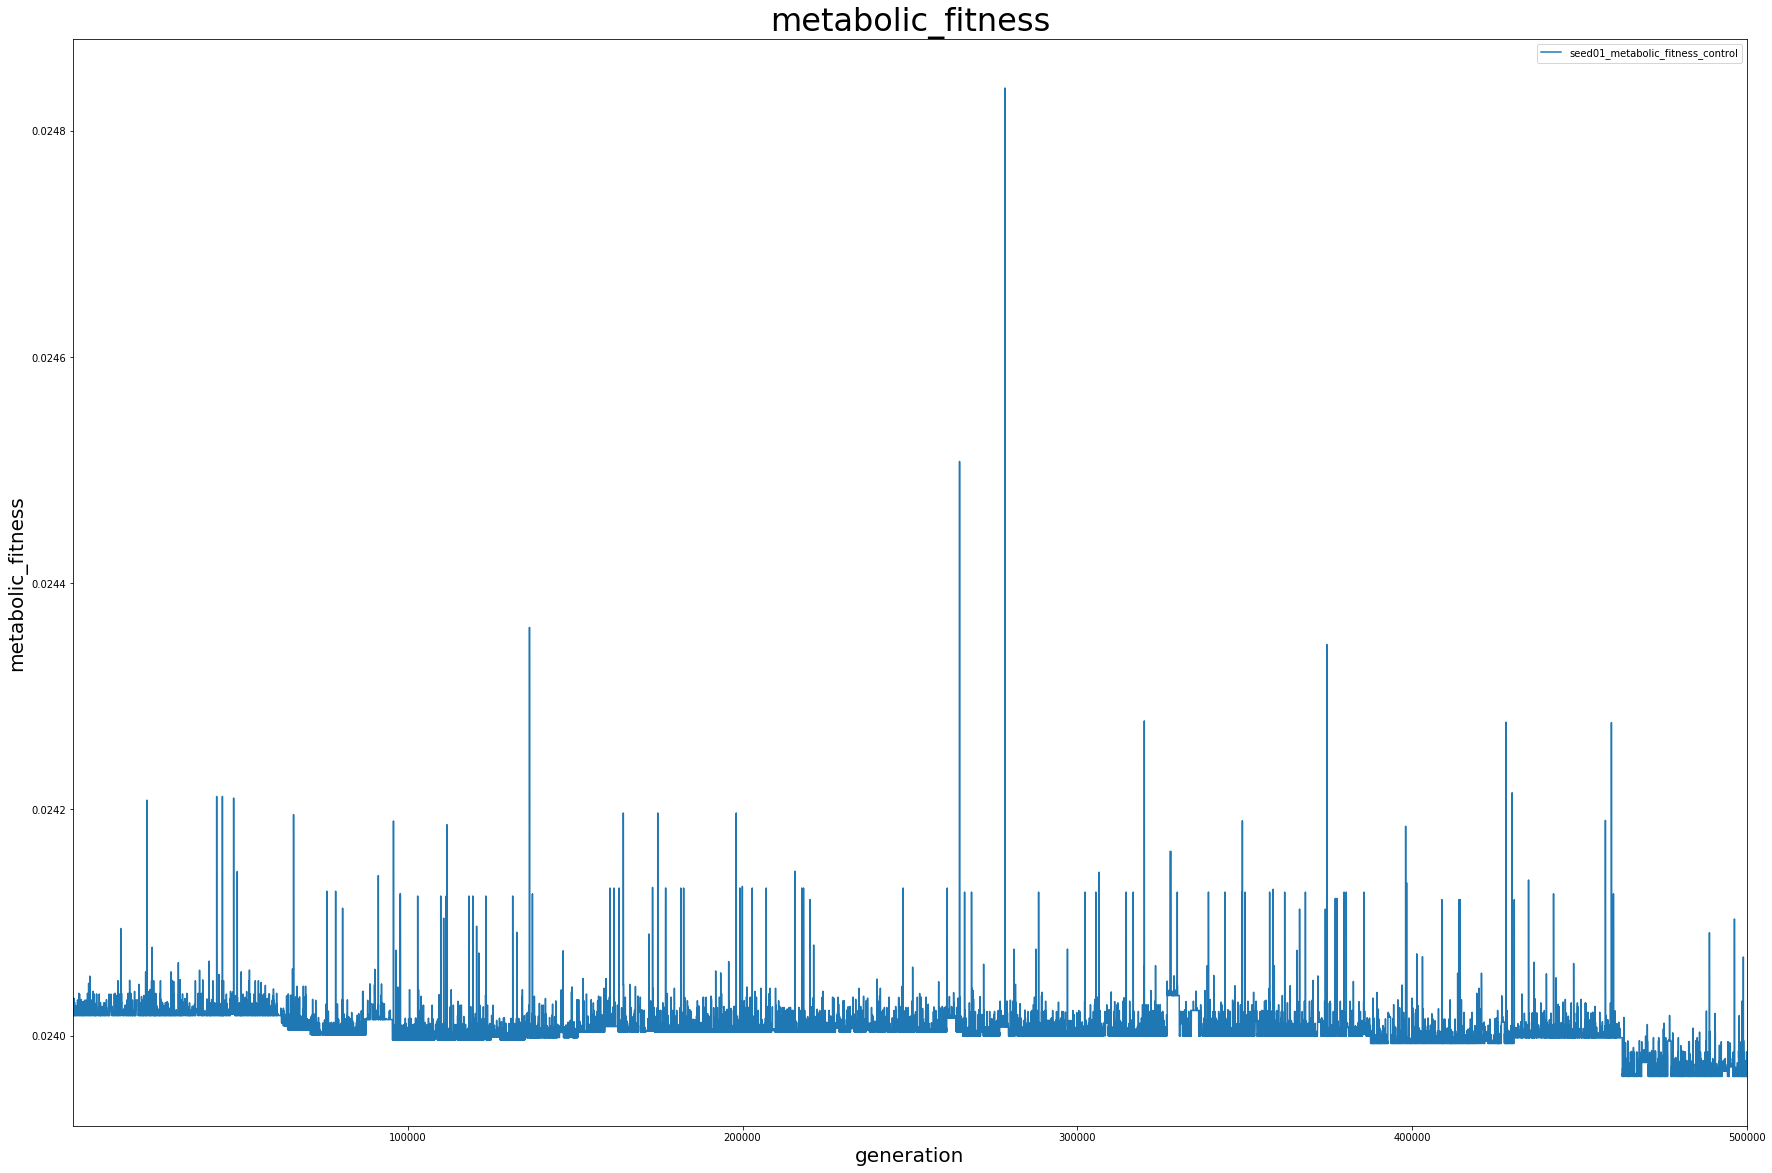

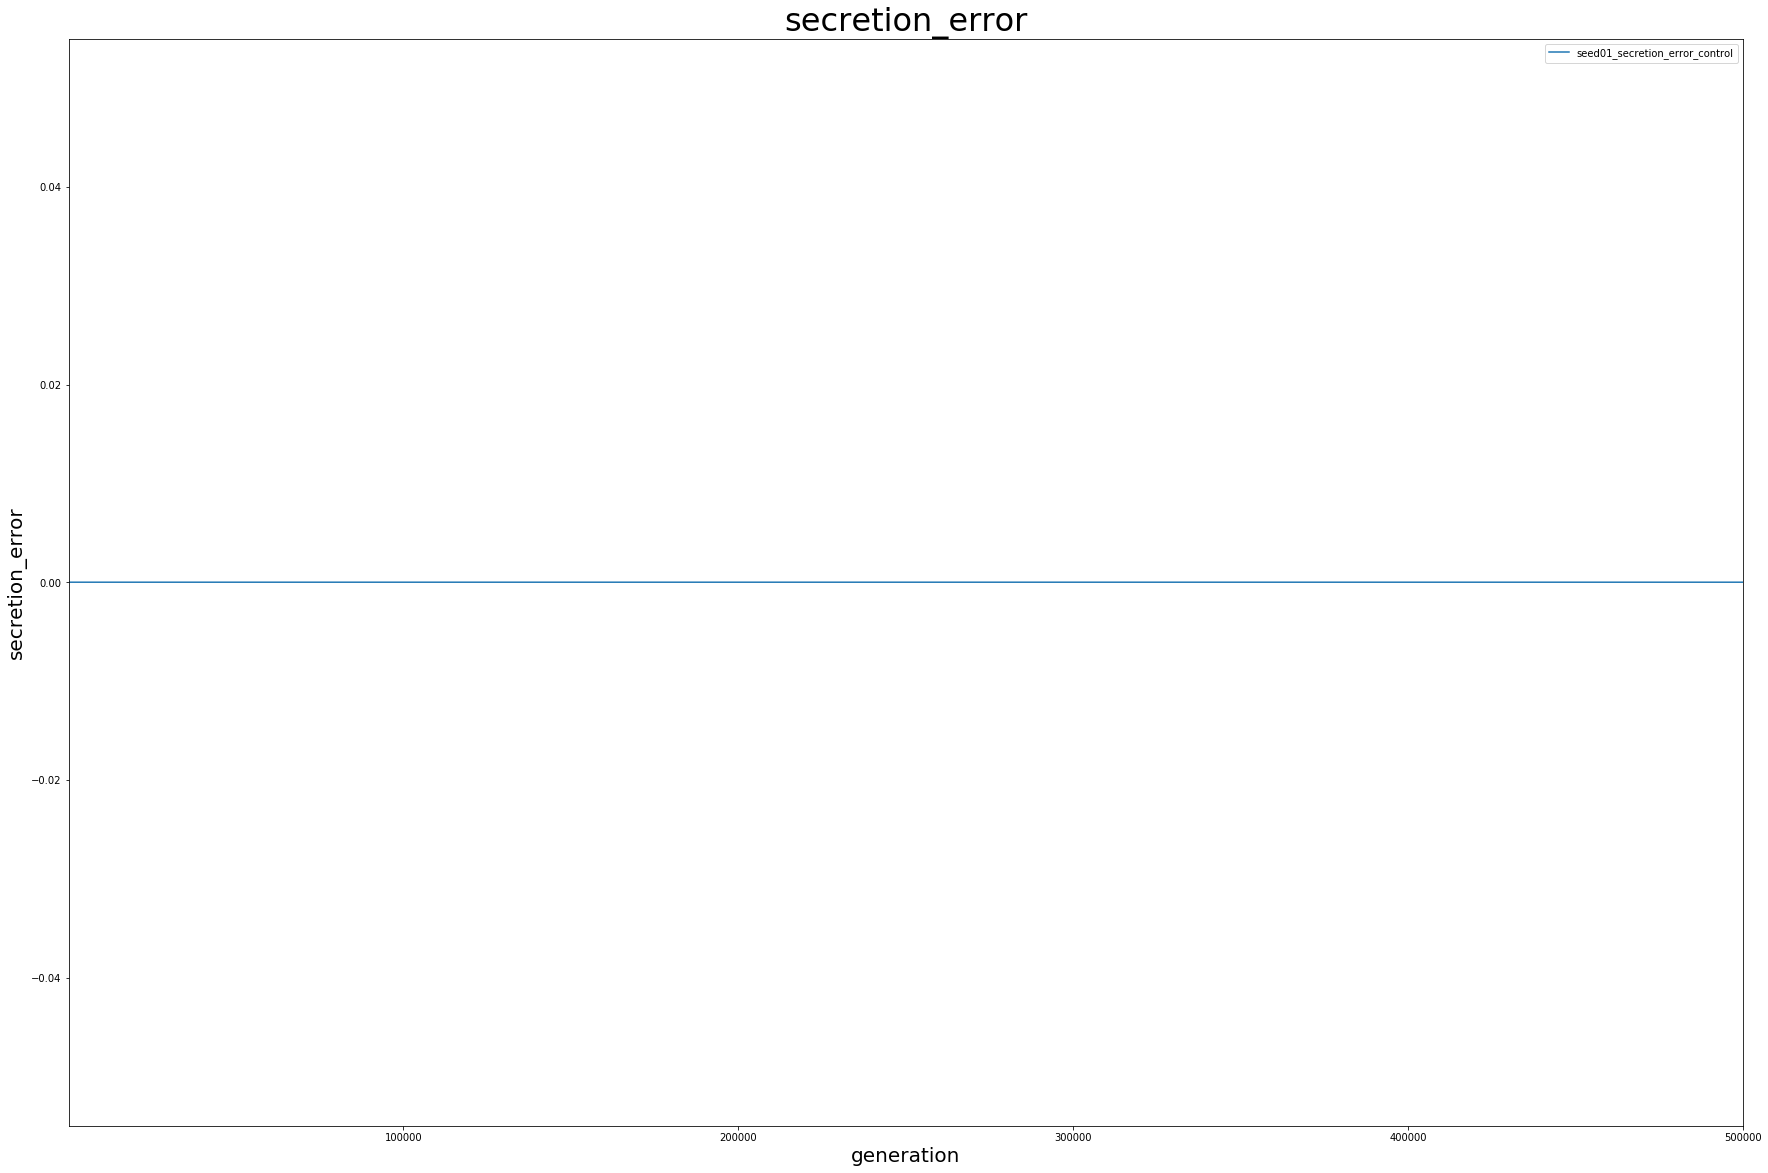

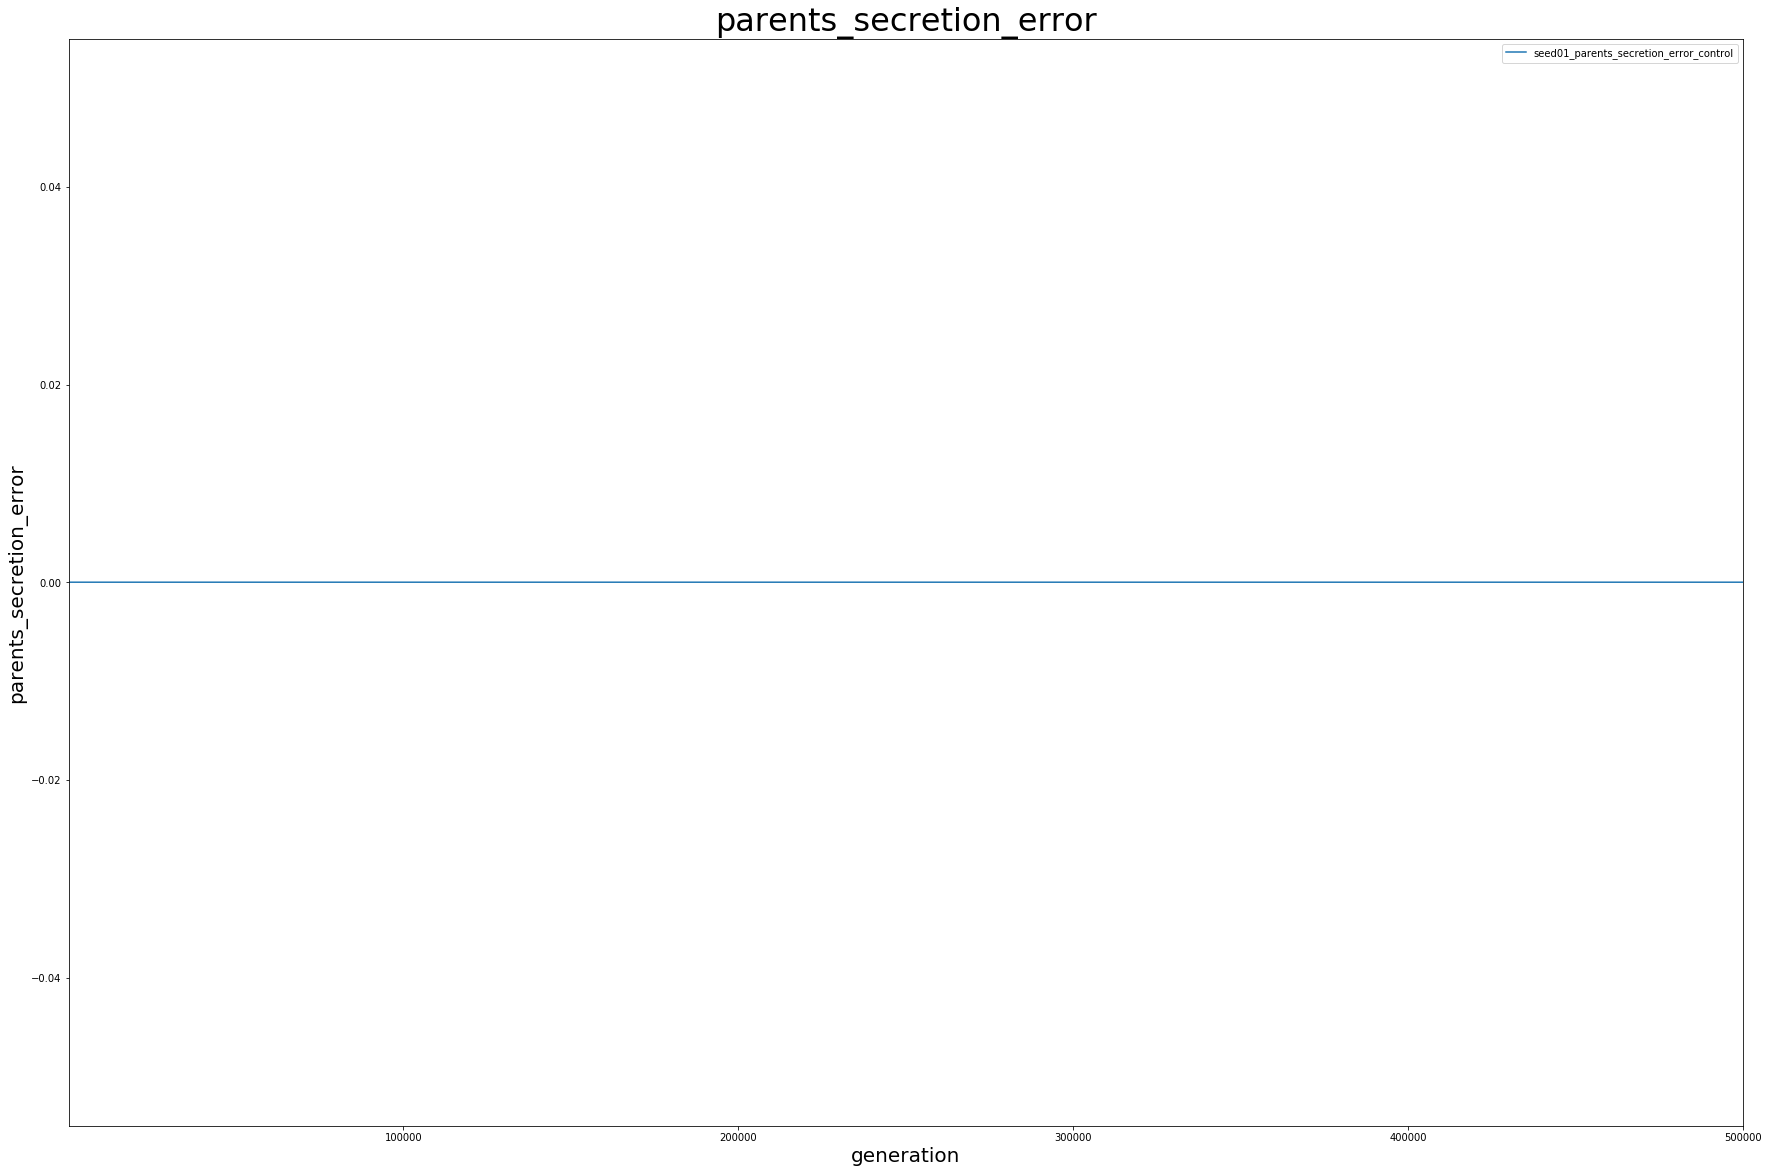

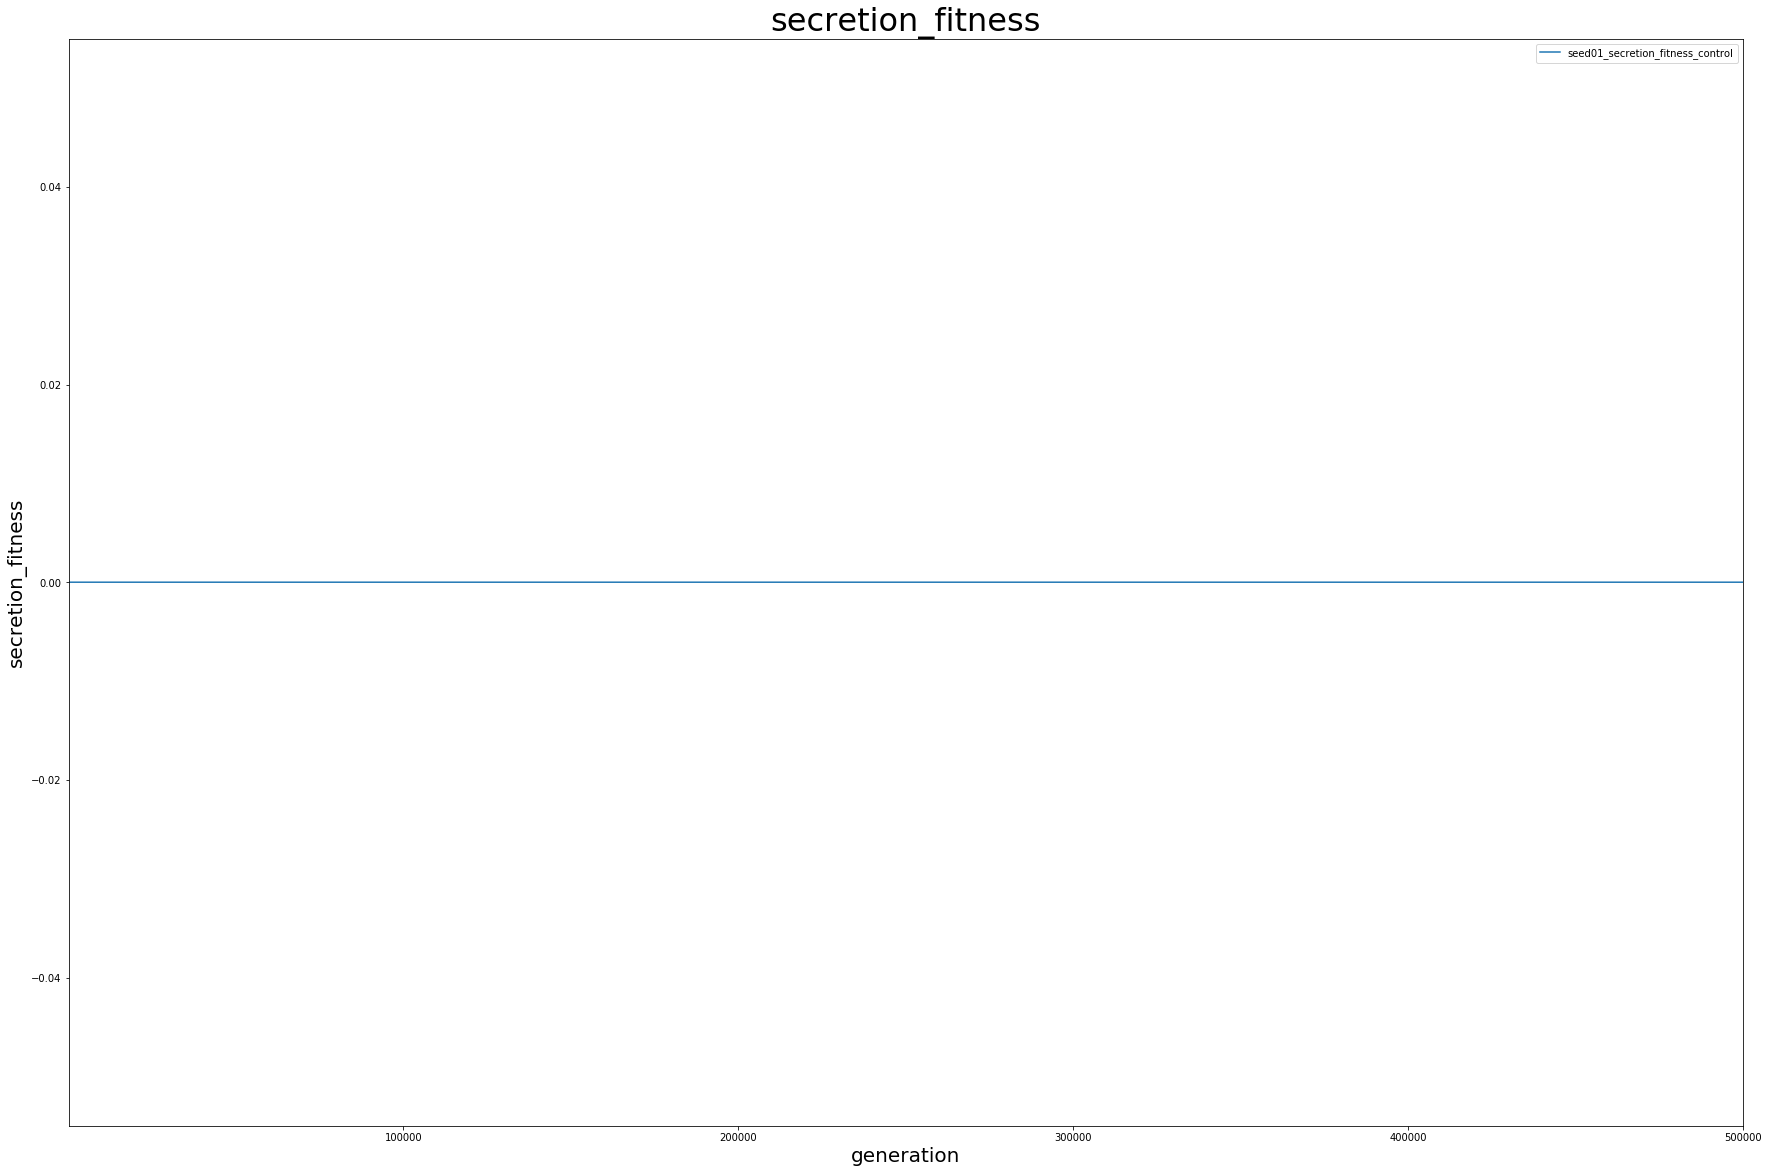

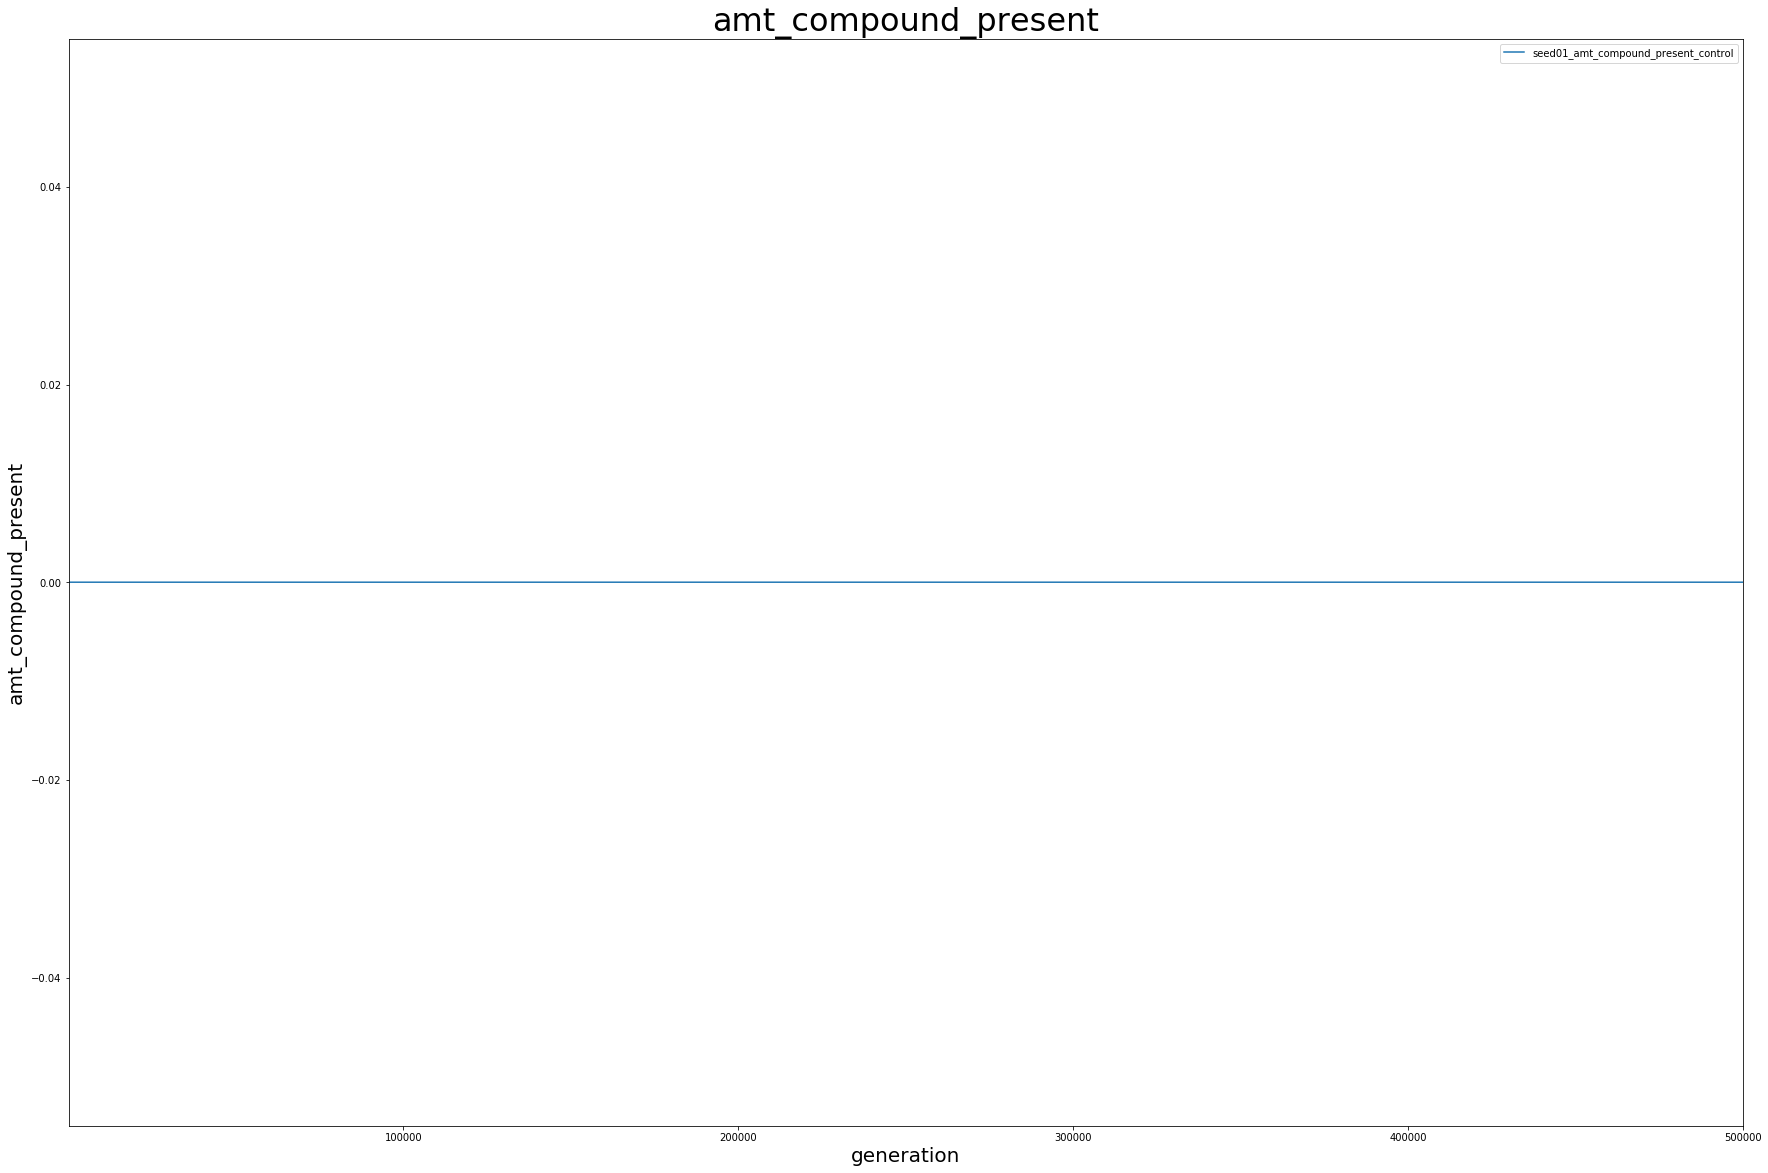

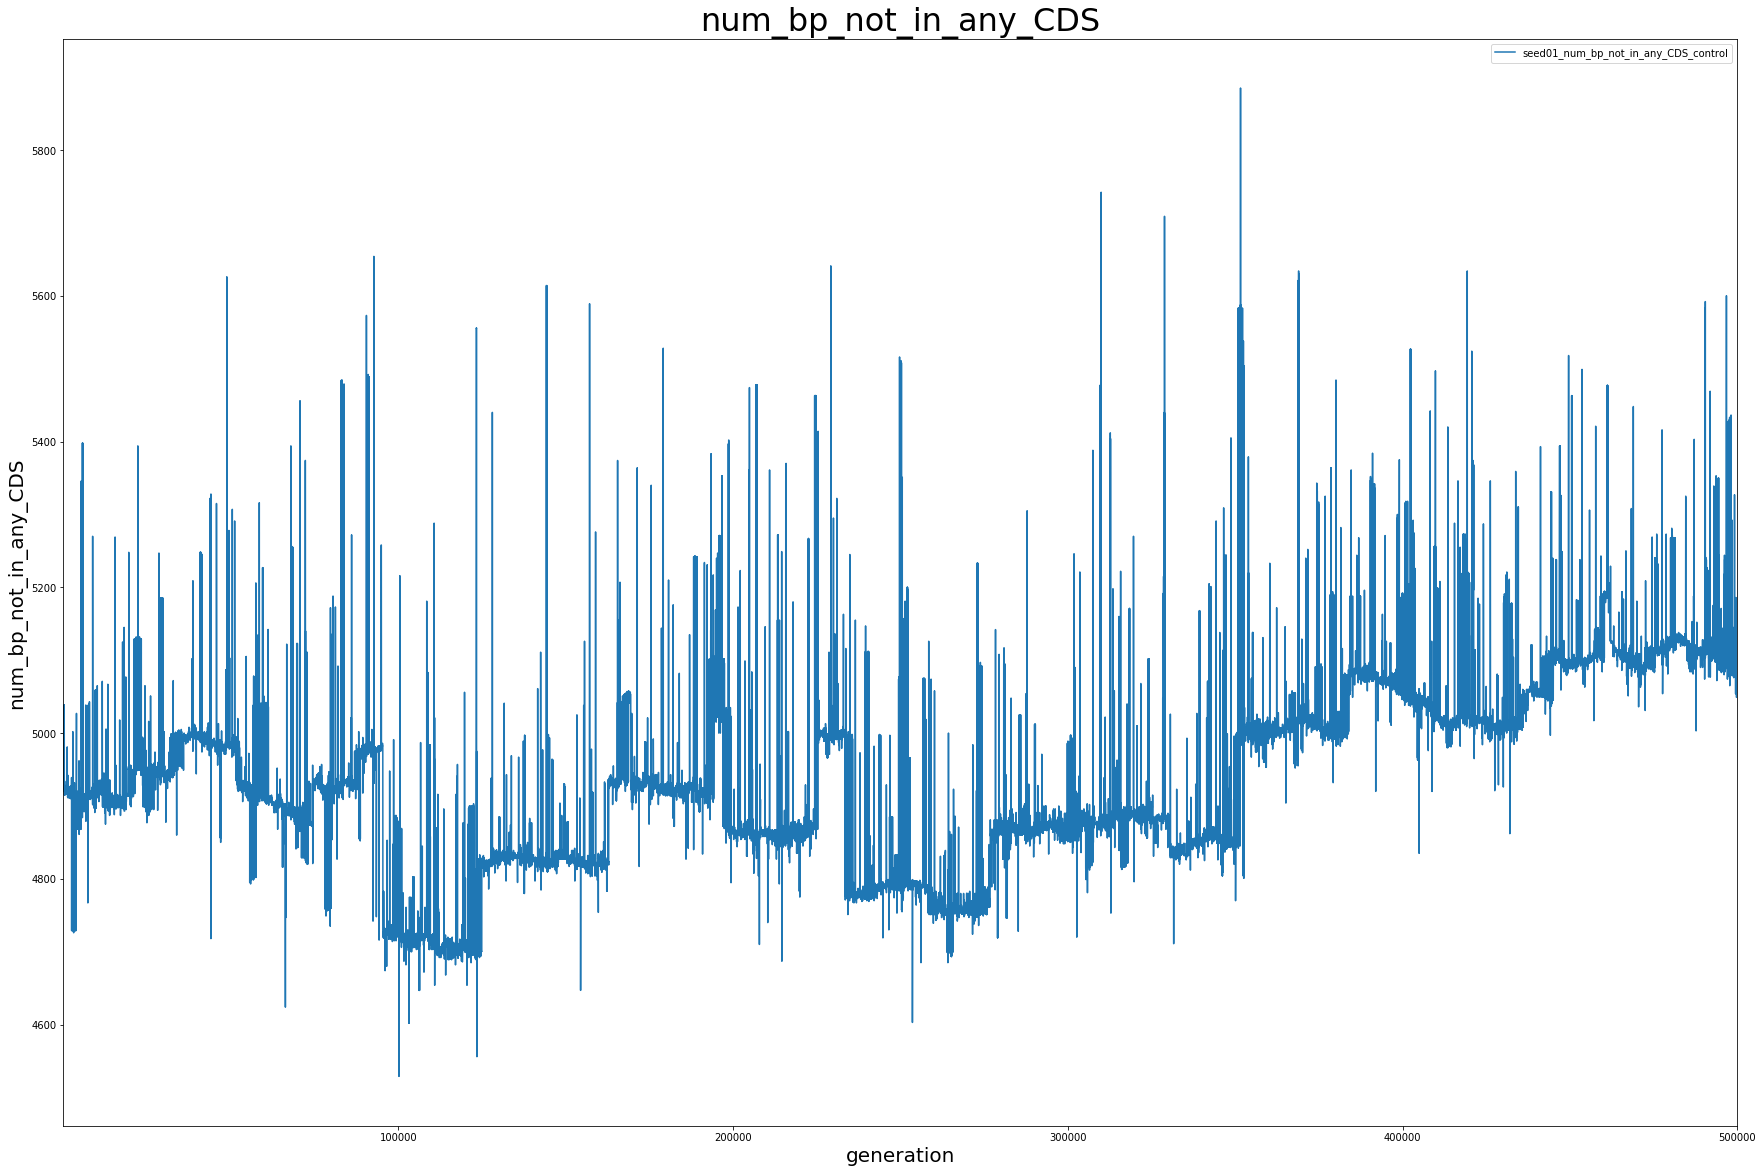

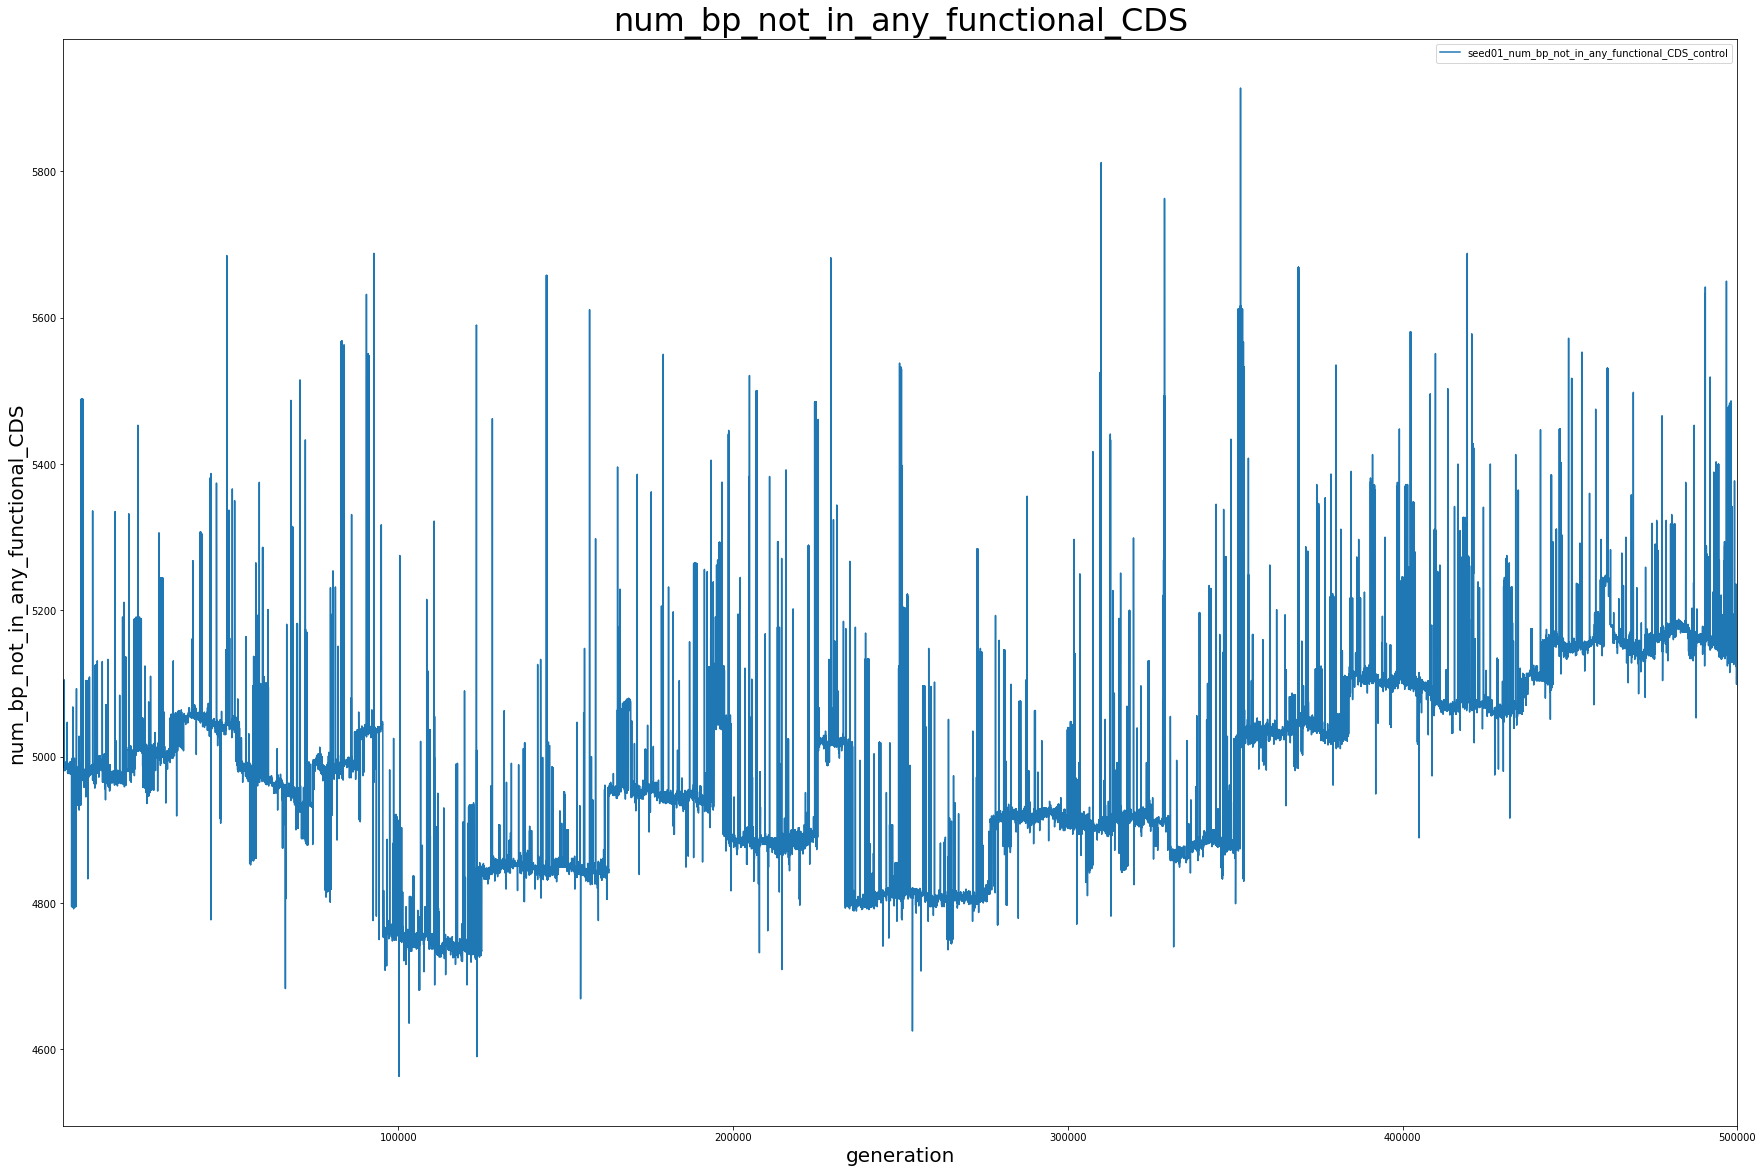

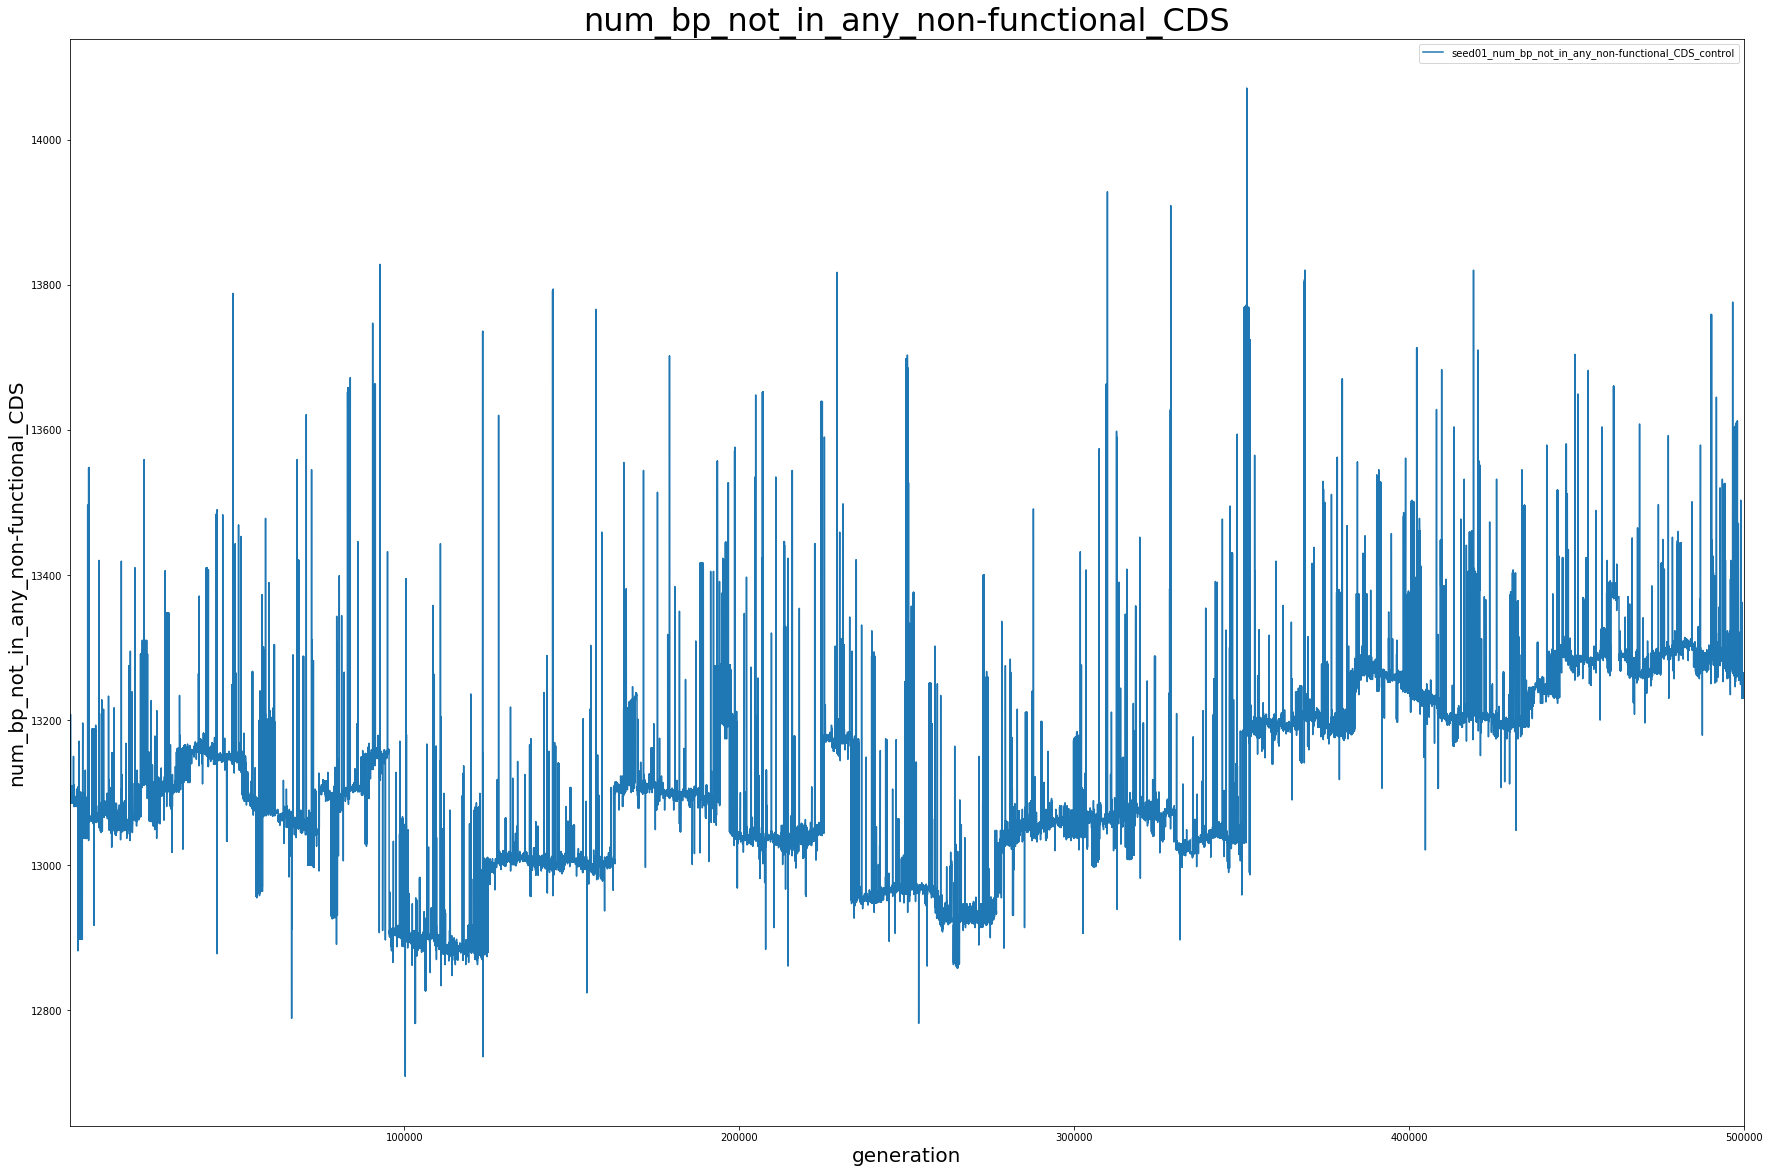

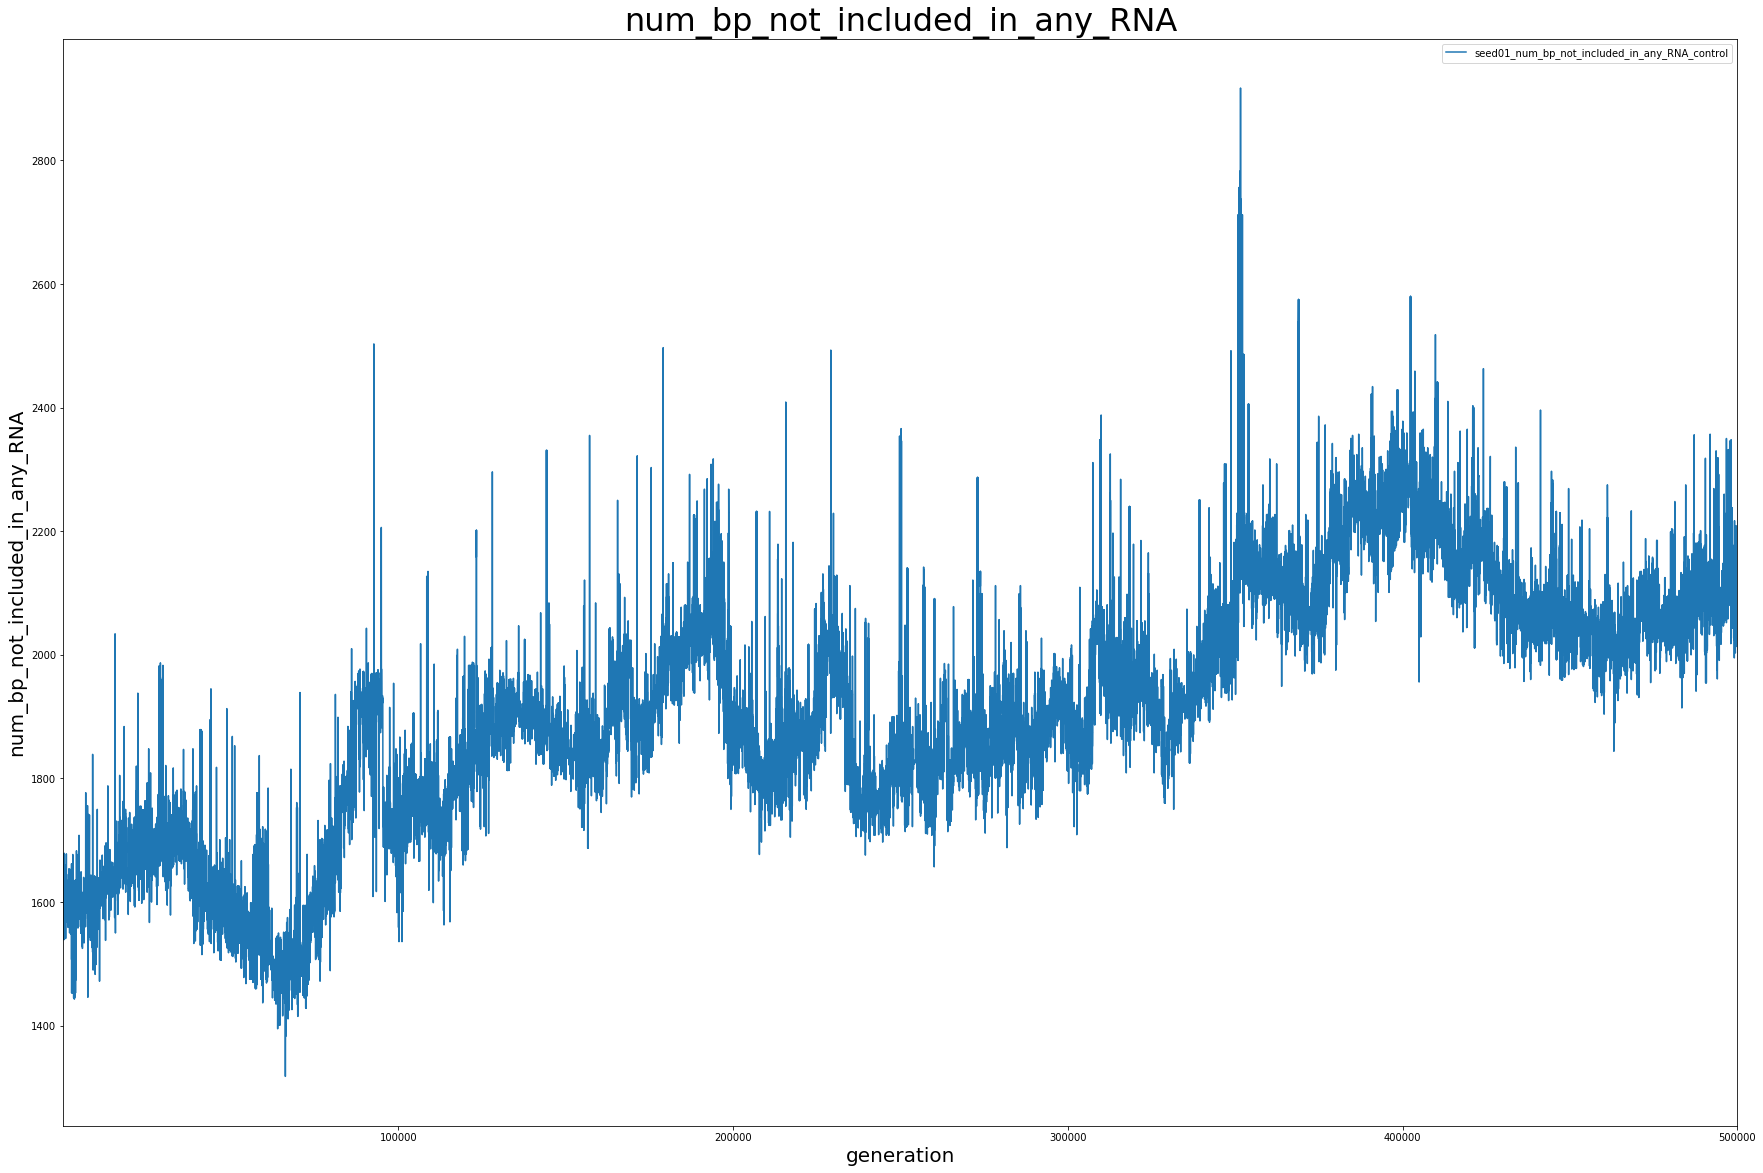

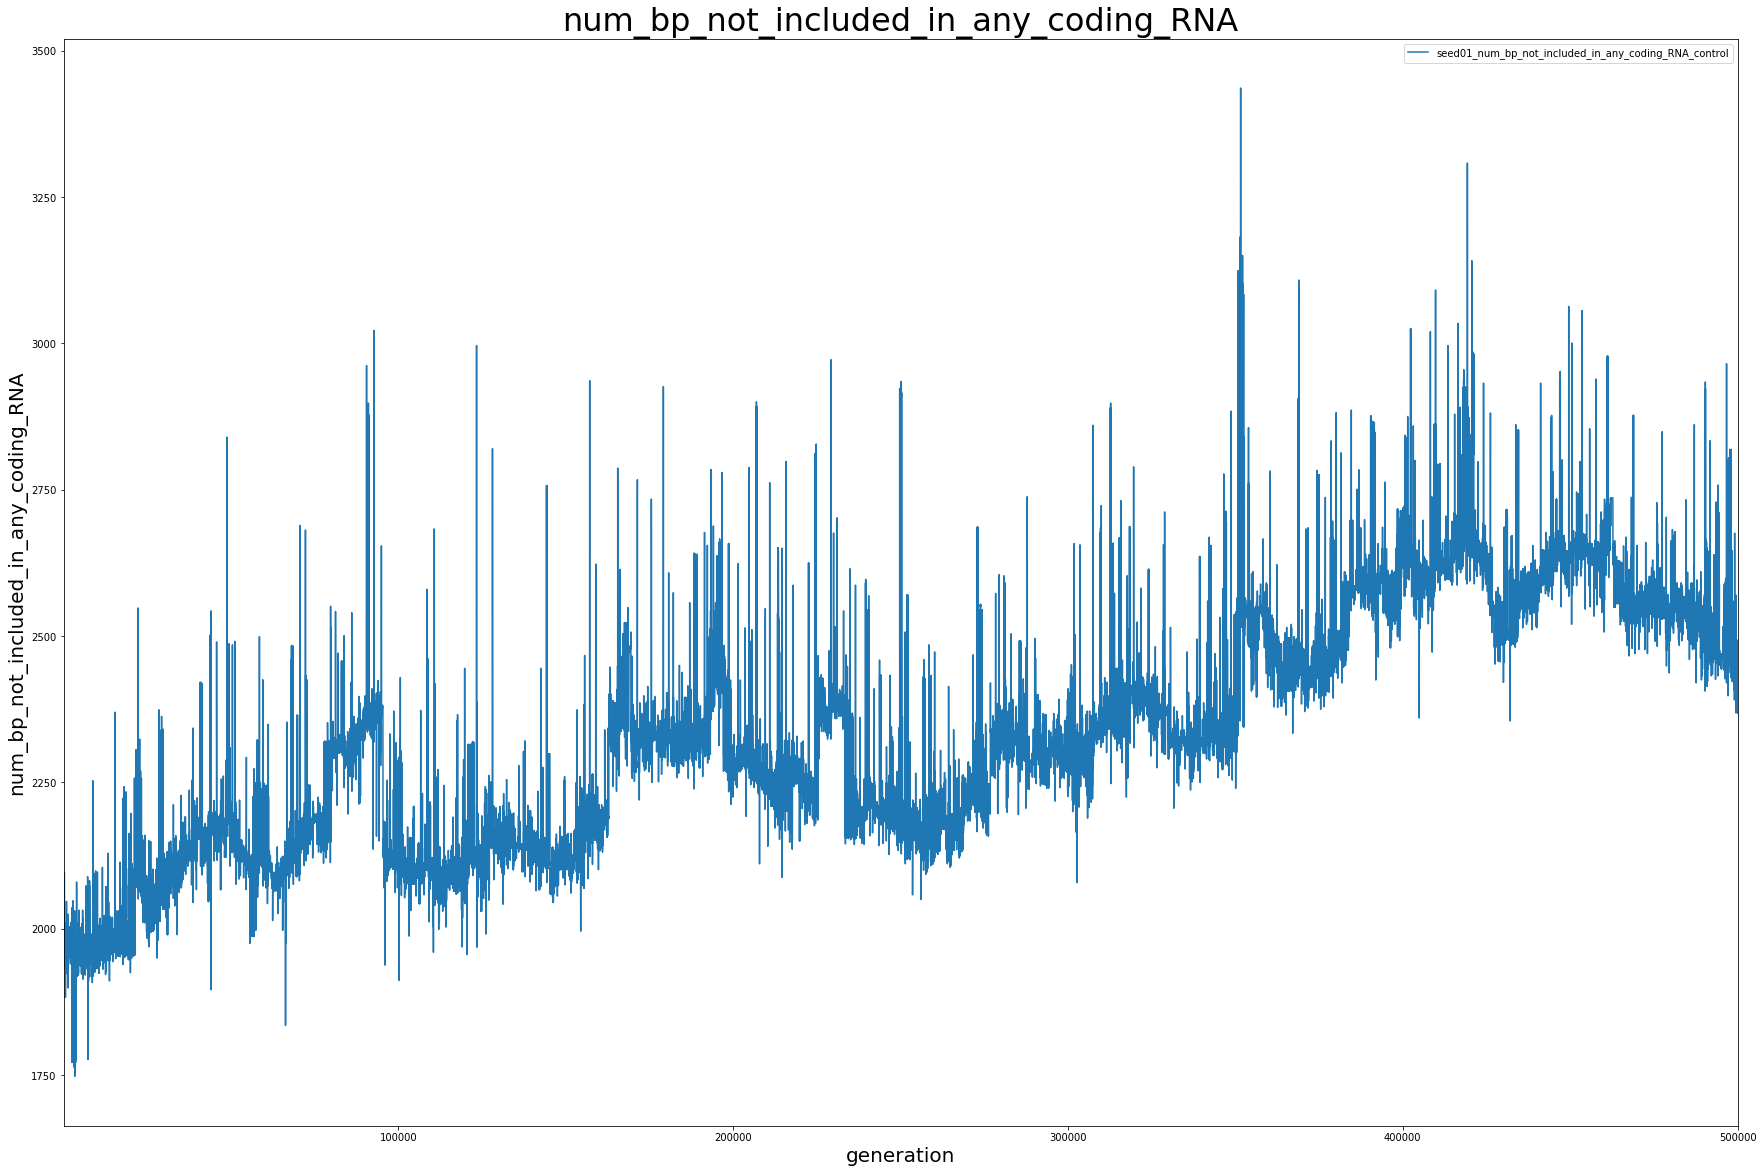

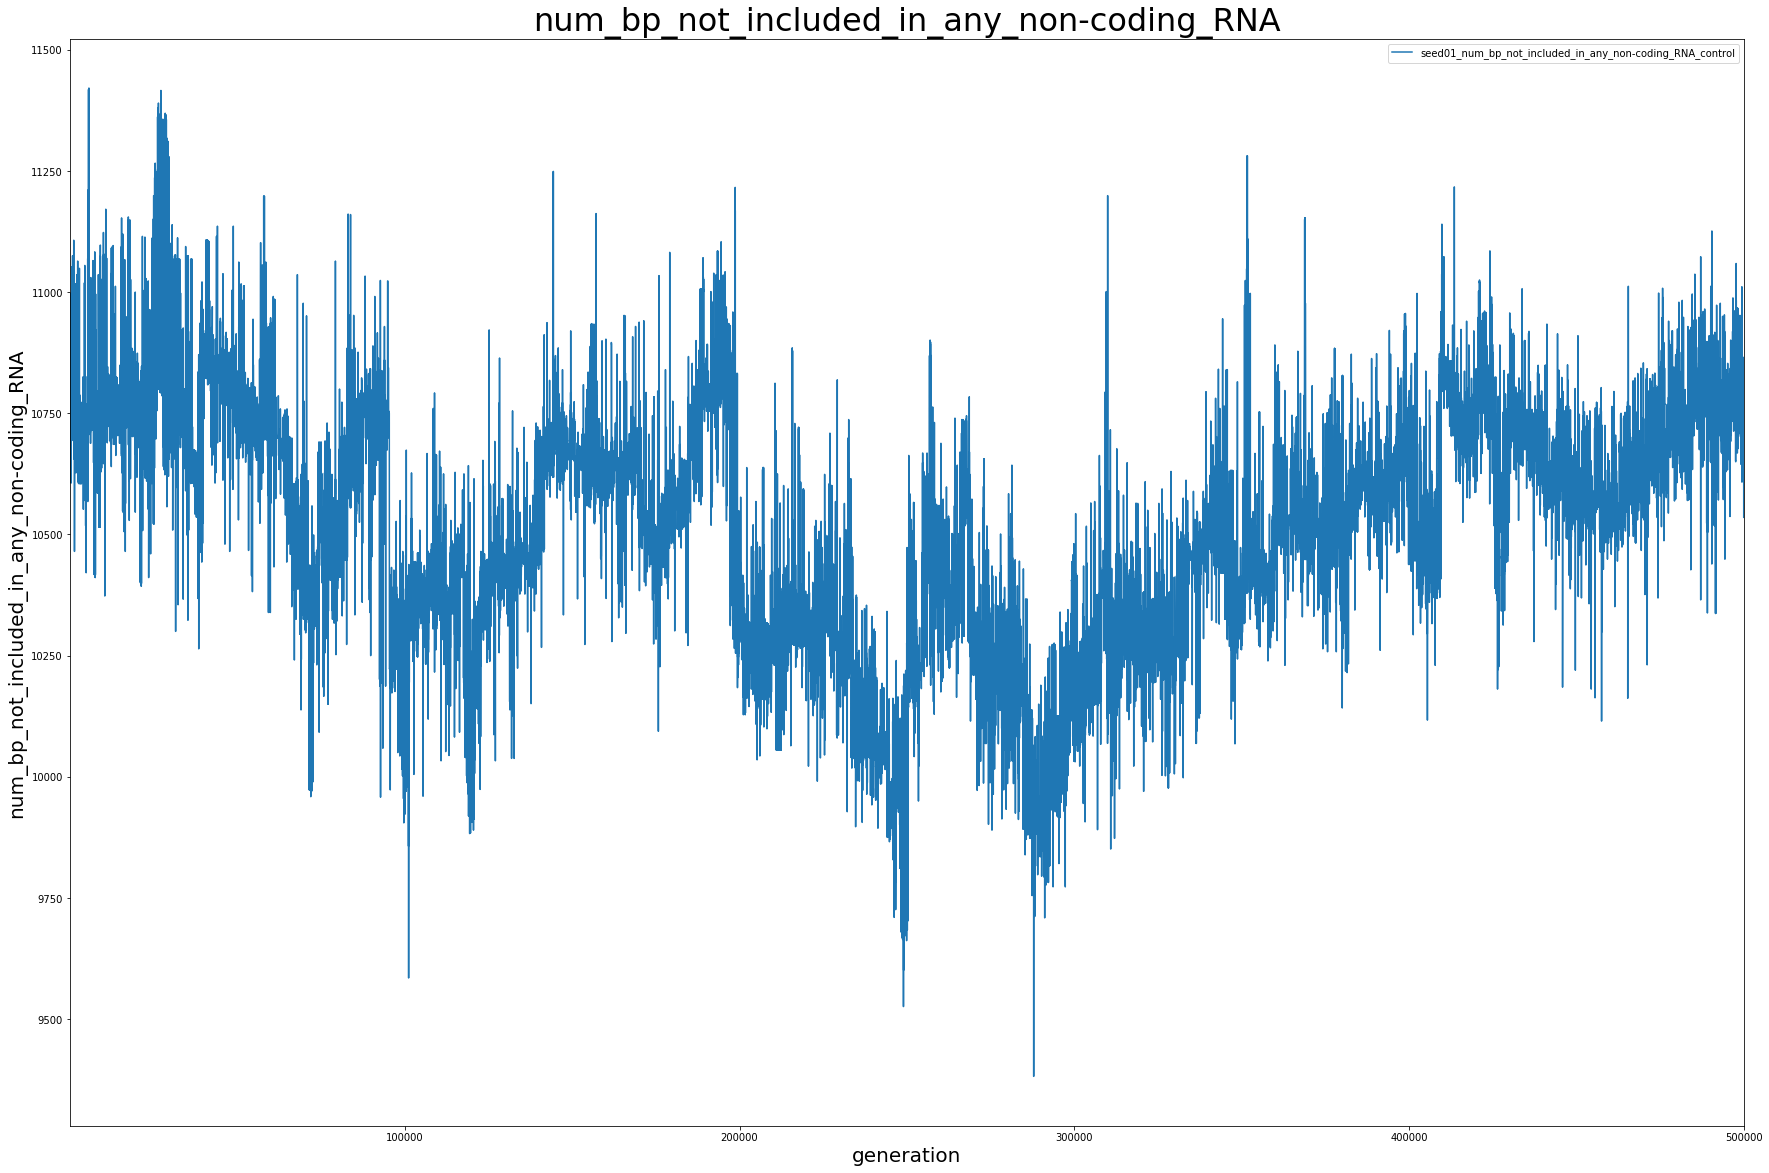

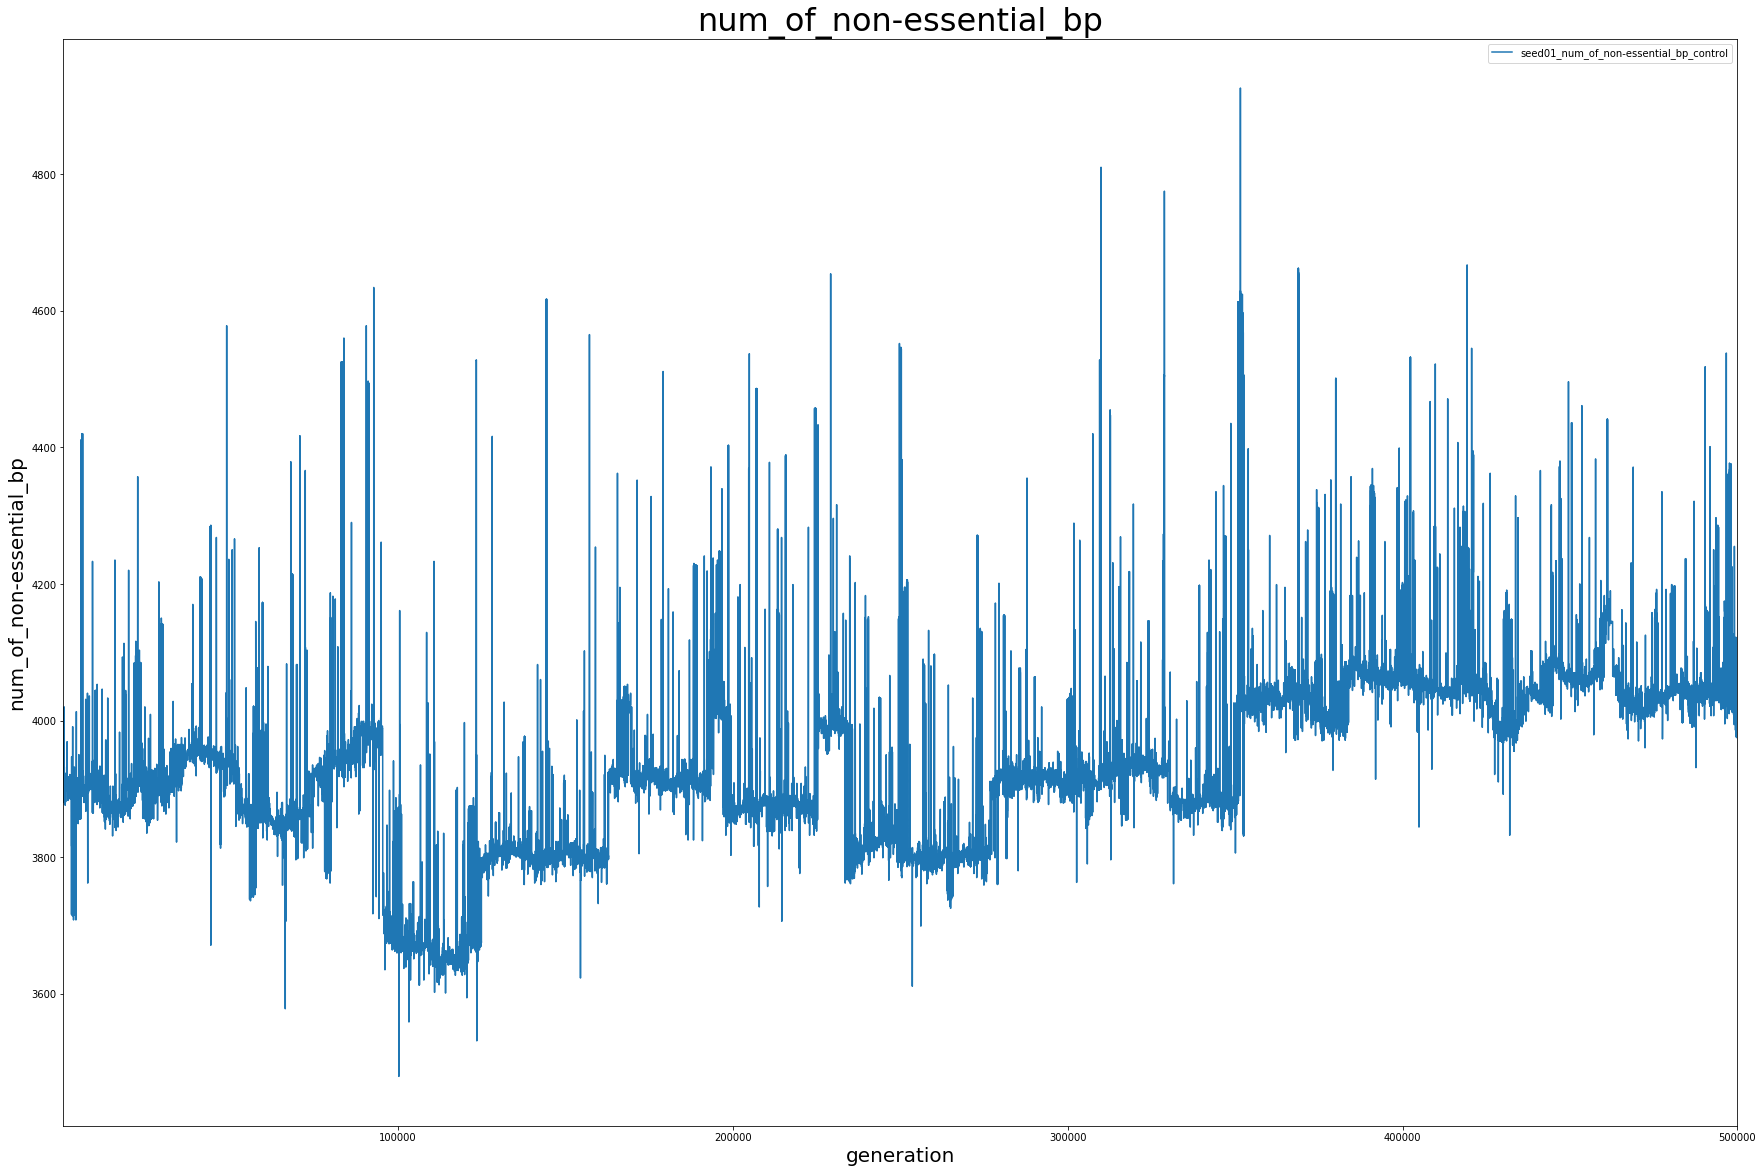

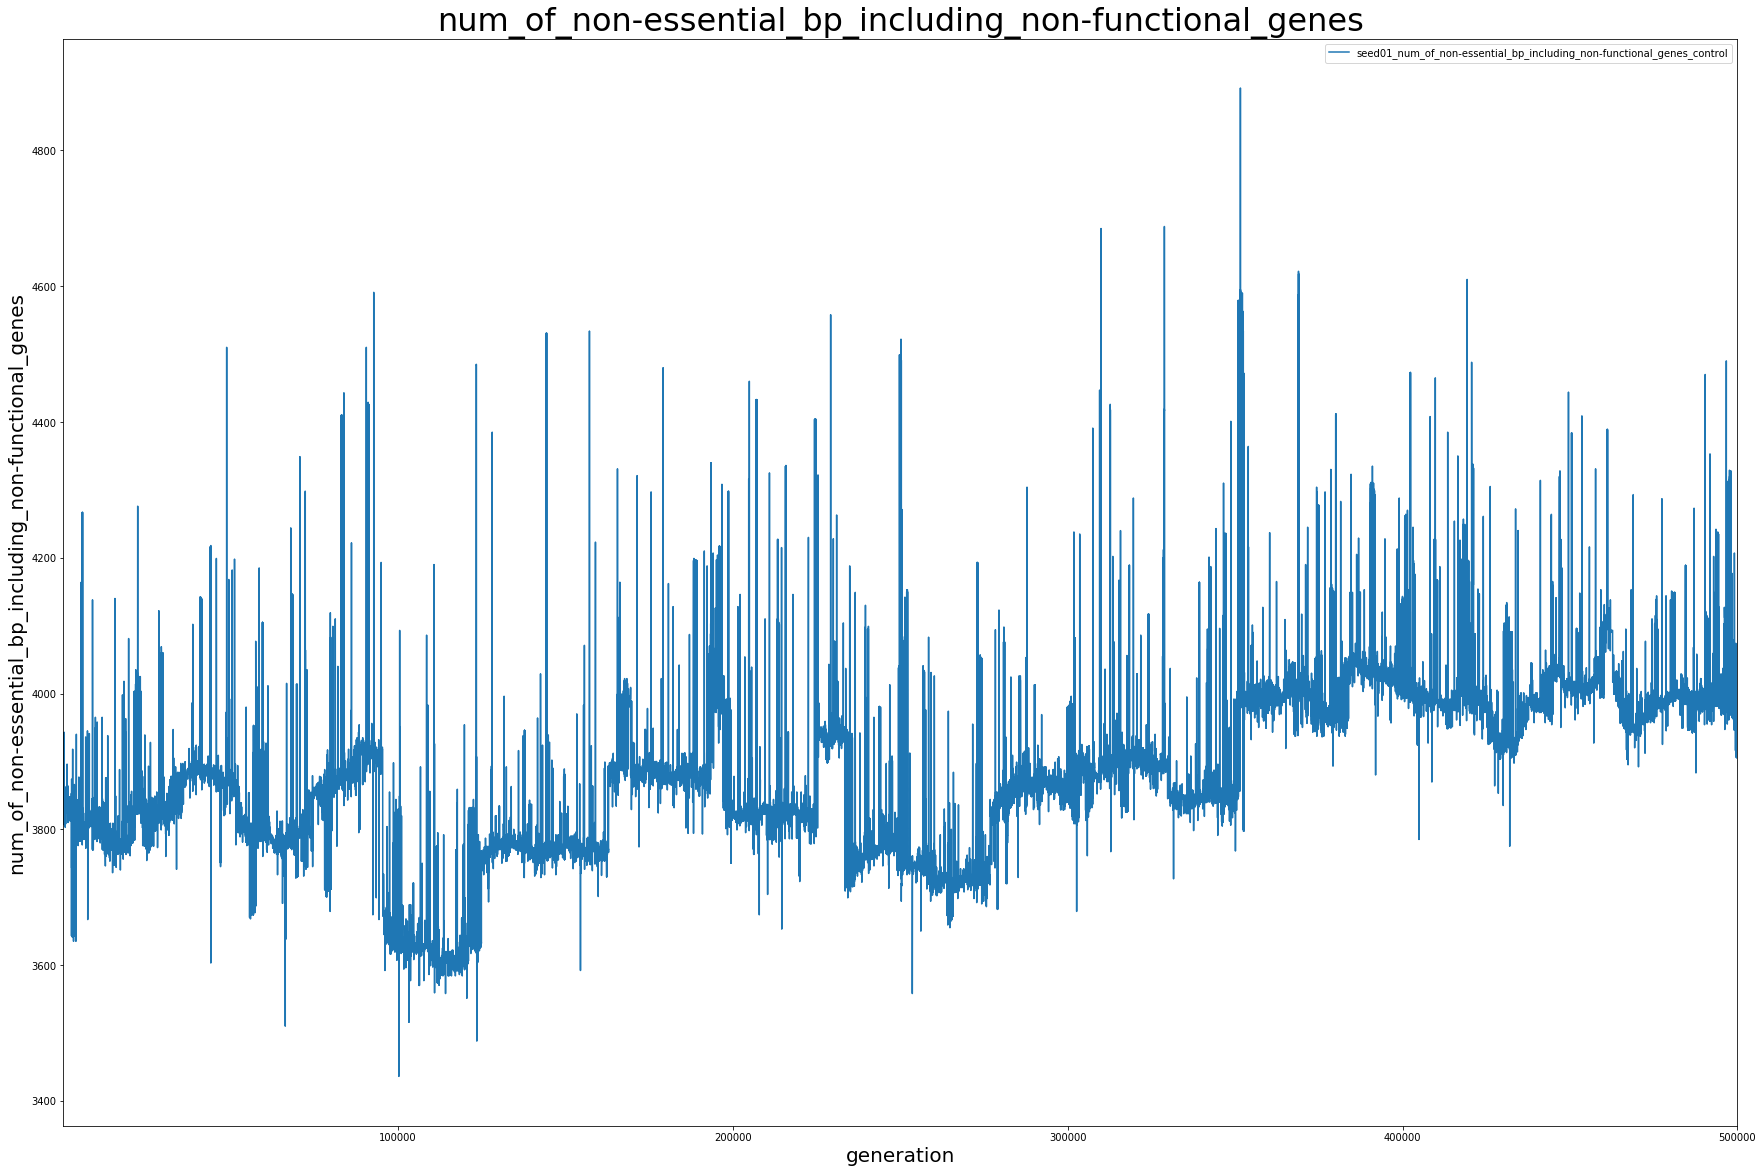

In [21]:
print("Graphing...")

print("fitness_best")
for col_header in fitness_best_names:
    if col_header == "generation":
        continue
    else:
        # Create new graph
        fig_fitness = plt.figure(figsize=(30,20))
        ax_fitness = fig_fitness.add_subplot(111)
        ax_fitness.set_title(col_header, fontsize=32)
        ax_fitness.set_xlabel("Generation", fontsize=20)
        ax_fitness.set_ylabel(col_header, fontsize=20)
        # Plot the DataFrames
        df_seed01_control_fitness_best.plot(x='generation', y=col_header, label="seed01_"+col_header+"_control", ax=ax_fitness)
        #df_seed01_mutation_up_fitness_best.plot(x='generation', y=col_header, label="seed01_"+col_header+"_mut_up", ax=ax_fitness)
        fig_fitness.savefig(OUTPUT_ROOT_DIR + "fitness_" + col_header+".png")

print("done with fitness_best") 

print("bp_best")
for col_header in bp_best_names:
    if col_header == "generation":
        continue
    else:
        fig_bp_best = plt.figure(figsize=(30,20))
        ax_bp_best = fig_bp_best.add_subplot(111)
        ax_bp_best.set_title(col_header, fontsize=32)
        ax_bp_best.set_xlabel("Generation", fontsize=20)
        ax_bp_best.set_ylabel(col_header, fontsize=20)
        # Plot the DataFrames
        df_seed01_control_bp_best.plot(x='generation', y=col_header, label="seed01_"+col_header+"_control", ax=ax_bp_best)
        fig_bp_best.savefig(OUTPUT_ROOT_DIR + "bp_best_"+col_header+".png")

print("done with bp_best")
print("done.")